# Taller 1
## Henry David Saenz Valverde
## Visualización de Datos - Keyla Alba

**Realizar un  Análisis Exploratorio de Datos (EDA) utilizando datos financieros obtenidos de Yahoo Finance.**

https://finance.yahoo.com/

Este análisis debe proporcionar una visión general completa de los datos, identificando patrones, tendencias y posibles anomalías que puedan influir en el análisis posterior.


*   Generar un resumen estadístico de los datos, incluyendo la media, mediana, desviación estándar, mínimos y máximos.

*   Identificar tendencias a largo plazo y posibles patrones estacionales.


* Realizar un análisis de autocorrelación y autocorrelación parcial para evaluar la dependencia temporal.

* Descomponer la serie temporal en componentes de tendencia, estacionalidad y residuo utilizando un modelo aditivo.  

*   Realizar la prueba de Shapiro-Wilk para evaluar la normalidad de los residuos de la descomposición y crear un gráfico Q-Q (Quantile-Quantile) de los residuos.

# Análisis Exploratorio de los Datos para la serie de tiempo

## Paquetes y librerías necesarias

Se instalarán los paquetes y librerías de python necesarias para realizar un análisis y predictivo de la serie temporal.

In [ ]:
!pip install ta
!pip install statsmodels
!pip install scipy
!pip install pandas_datareader
!pip install yfinance
!pip install matplotlib
!pip install seaborn
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install pandas-datareader

In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
from scipy.stats import shapiro
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
# import statsmodels.tsa.api as smtsa
from statsmodels.tsa.stattools import adfuller
from scipy.stats import kstest
import datetime  # Usar la biblioteca estándar datetime
plt.rcParams['text.usetex'] = False  # Desactivar el uso de LaTeX
from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, close, subplots, title
# import requests
# import io
from statsmodels.tsa import stattools
import seaborn as sns
# from pmdarima import arima
# from pmdarima import datasets
# from pmdarima import utils
import warnings
import ta
from ta import trend
from statsmodels.tsa import seasonal
import os
import pickle
warnings.simplefilter(action="ignore", category=FutureWarning)
# from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.api import ExponentialSmoothing
# from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import r2_score
from statsmodels.graphics.gofplots import qqplot


## Importación de datos

Para el desarrollo del análisis y predicción de la serie de tiempo se tomarán los datos de la base de datos fincnacieros y de acciones de `Yahoo! Finances` y se tomarán las acciones de `NVIDIA` desde enero de 2016 hasta julio de 2024, la variable para analizar es el precio de cierre diario `Adj Close`. Inicialmente se hace carga de los datos y se agrega una columna adicional al índice para la fecha.

In [ ]:
NVD = yf.download("NVDA", start = "2016-01-01", end = "2024-07-31")
NVD.to_csv("NVD.csv")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data = pd.read_csv('NVD.csv', parse_dates= ["Date"], index_col= "Date")
data['fecha'] = pd.to_datetime(data.index)
print('No. de filas, columnas:', data.shape)
data.head()

No. de filas, columnas: (2157, 7)


,Open,High,Low,Close,Adj Close,Volume,fecha
Date,,,,,,,
2016-01-04,0.80725,0.81450,0.80100,0.80925,0.789858,358076000,2016-01-04
2016-01-05,0.82450,0.83600,0.81250,0.82225,0.802547,490272000,2016-01-05
2016-01-06,0.80875,0.81250,0.77900,0.78825,0.769361,449344000,2016-01-06
2016-01-07,0.76850,0.77375,0.74700,0.75700,0.738860,645304000,2016-01-07
2016-01-08,0.76675,0.76750,0.73925,0.74075,0.723000,398472000,2016-01-08


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2157 entries, 2016-01-04 to 2024-07-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       2157 non-null   float64       
 1   High       2157 non-null   float64       
 2   Low        2157 non-null   float64       
 3   Close      2157 non-null   float64       
 4   Adj Close  2157 non-null   float64       
 5   Volume     2157 non-null   int64         
 6   fecha      2157 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 134.8 KB


## Análisis Descriptivo de los Datos
**Resumen estadístico**

La acción de `NVIDIA` a lo largo del tiempo muestra una tendencia alzista, considerando en este caso `2157` observaciones y haciendo énfasis en la variable 'Adj Close' o precio de cierre. Podemos observar que el mínimo por acción es 0.63050 y el máximo es 155.5800, por otro lado, para el precio de apertura se tiene un mínimo de 0.6195 y un máximo de 139.8000. El precio promedio de la acción para el cierre es `17.779` con una desviación estándar de `23.8962`, una mediana de `7.2397` y un rango intercuartilico de `16.51`.

In [ ]:
  data.describe()

,Open,High,Low,Close,Adj Close,Volume,fecha
count,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2.157000e+03,2157
mean,17.811080,18.132582,17.459465,17.810664,17.779826,4.957590e+08,2020-04-14 22:25:12.100139264
min,0.619500,0.639000,0.618750,0.630500,0.615392,9.788400e+07,2016-01-04 00:00:00
25%,4.154250,4.204250,4.089500,4.139000,4.097881,3.369040e+08,2018-02-23 00:00:00
50%,7.181000,7.328500,7.121500,7.239750,7.214335,4.424200e+08,2020-04-16 00:00:00
75%,20.707001,20.875000,20.332001,20.671000,20.641411,5.885070e+08,2022-06-06 00:00:00
max,139.800003,140.759995,132.419998,135.580002,135.568405,3.692928e+09,2024-07-30 00:00:00
std,23.929890,24.352652,23.407434,23.890269,23.896238,2.571632e+08,NaN


### Serie de tiempo Original

Se grafica la serie de tiepo original a continuación:

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])
fig.update_layout(
    title='NVIDIA (NVDA)',
    xaxis_title='DATE',
    yaxis_title='NVDA',
    font=dict(
        family='Courier New, monospace',
        size=12,
        color='RebeccaPurple'
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

### Autocorrelación y autocorrelación parcial

Las siguientes gárficas muestran la serie temporal original y un gráfico de autocorrelación y autocorrelación parcial con el objetivo de intuir o determinar si la serie es estacionaria o no es estacionaria.

- `La gráfica de autocorrelación (ACF)` muestra cómo los valores de una serie temporal están correlacionados con ellos mismos en diferentes intervalos de tiempo (o rezagos), para `'NVD'` El gráfico de autocorrelación `ACF` presenta elementos fuera de la banda de significancia y con una tendencia decreciente, lo que es un indicio de no estacionariedad.
- `La gráfica de autocorrelación parcial (PACF)` mide la correlación entre un valor en la serie y sus versiones pasadas, eliminando el efecto de los valores intermedios. Además, en este se presentan más de dos observaciones fuera de la banda de significacia por lo que se condfirma que la serie de tiempo no es estacionaria.


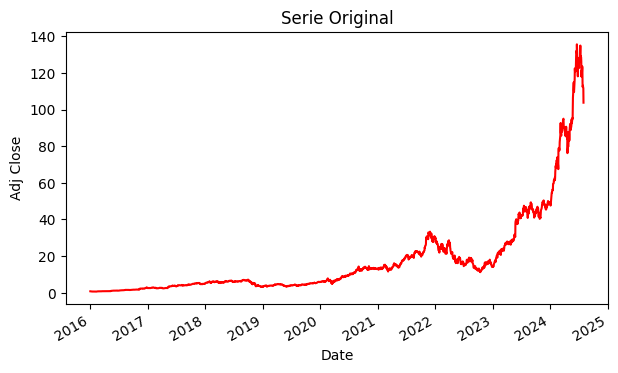

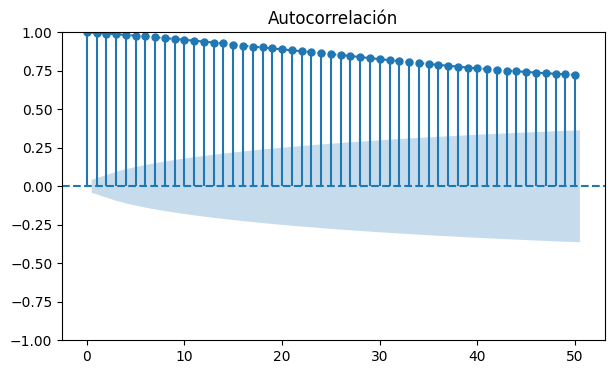

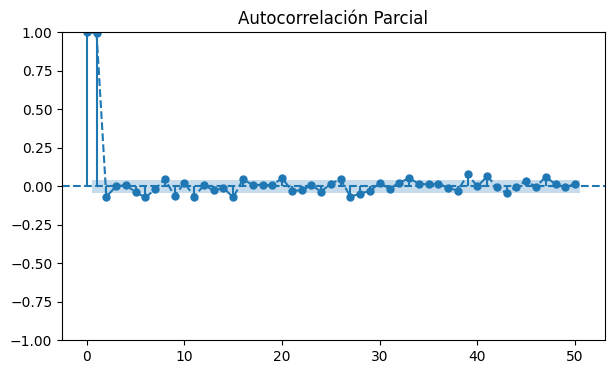

In [ ]:
if data['Adj Close'].isnull().sum() > 0:
    data['Adj Close'] = data['Adj Close'].fillna(method='ffill')

# Parámetros para las gráficas
plt.rcParams.update({'figure.figsize': (7, 4)})
plt.rcParams['text.usetex'] = False

# Número de retardos (lags) para ACF y PACF
nlag = 50

# Plot de la serie de tiempo original
data['Adj Close'].plot(color='r')
plt.title('Serie Original')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

# Plot de la función de autocorrelación (ACF) de la serie original
plot_acf(data['Adj Close'], lags=nlag, linestyle='--')
plt.title('Autocorrelación')
plt.show()

# Plot de la función de autocorrelación parcial (PACF) de la serie original
plot_pacf(data['Adj Close'], lags=nlag, linestyle='--')
plt.title('Autocorrelación Parcial')
plt.show()


La **No estacionariedad** también puede comprobarse evaluando la media y la varianza en distintos.
* La diferencia en la media y la varianza valida la hipótesis de no estacionariedad. Por ejemplo, dividimos el conjunto de datos de **NVIDIA** en dos muestras, y evaluamos la media y la varianza para cada muestra del siguiente modo:

In [ ]:
Mean1, Mean2 = data.iloc[:1000].Close.mean(), data.iloc[1000:].Close.mean()
Var1, Var2 = data.iloc[:1000].Close.var(), data.iloc[1000:].Close.var()
print('mean1=%f, mean2=%f' % (Mean1, Mean2))
print('variance1=%f, variance2=%f' % (Var1, Var2))

mean1=3.801173, mean2=29.919126
variance1=3.197936, variance2=745.183564


La media y la varianza evaluadas para ambas muestras revelan una diferencia
significativa en los valores, lo que sugiere que los
datos no son estacionarios. Otra forma de evaluar la no estacionariedad es utilizar pruebas estadísticas como la prueba de **Dickey-Fuller (ADF)**.

Es una prueba de raíz unitaria que evalúa la fuerza de la tendencia en una componente de la serie temporal

### Método Analítico (Prueba Dickey Fuller aumentada ADF)

Es una prueba de raíz única que detecta estadísticamente la presencia de conducta tendencial estocástica en las series temporales de las variables mediante un contraste de hipótesis.


En presencia de una autocorrelación, es necesario diferenciar la serie del precio de cierre de Binance. por tal motivo las hipótesis a plantear son:

 **H0 : ρ =0** La serie tiene una raíz unitaria y no es estacionaria.

 **H1 : ρ <0** La serie no tiene una raíz unitaria y es estacionaria.

En otras palabras, la hipótesis nula es la presencia de la raíz unitaria o la no estacionariedad mientras que la hipótesis alternativa sugiere la estacionariedad de los datos.

In [ ]:
adf_result = adfuller(data["Adj Close"].tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: 0.230826
p-value: 0.973938


* Idealmente, un valor más negativo del estadístico ADF representará una señal estacionaria, en este caso de **NVIDIA** (0.230826), podria **NO** ser  **Estacionaria**



* Dado que **𝑝-value**= 0.973938 > 0.05. de Adfuller es mayor que un determinado valor alfa especificado (5%, nivel de significación o intervalo de confianza del 95%), No se rechaza la hipótesis nula (𝐻𝑜) es decir, la serie temporal No es estacionaria.

### Modelo Aditivo

Se descompone la serie temporal de manera aditiva para observar los componentes de la misma, se tiene que:
-  En el componente tendencial se observa una tendencia a la alza a lo largo del tiempo en la serie temporal.
- El tercer gráfico muestra el componente estacional de la serie de tiempo con picos continuos tanto positivos como negativos.
- El componente de variaciones irregulares se observa con bastante heterocedasticidad.

In [ ]:
decompose_model = seasonal.seasonal_decompose(data["Adj Close"].tolist(),
period=20, model='additive')

Text(0.5, 1.0, 'Variaciones irregulares del precio de cierre NVIDIA')

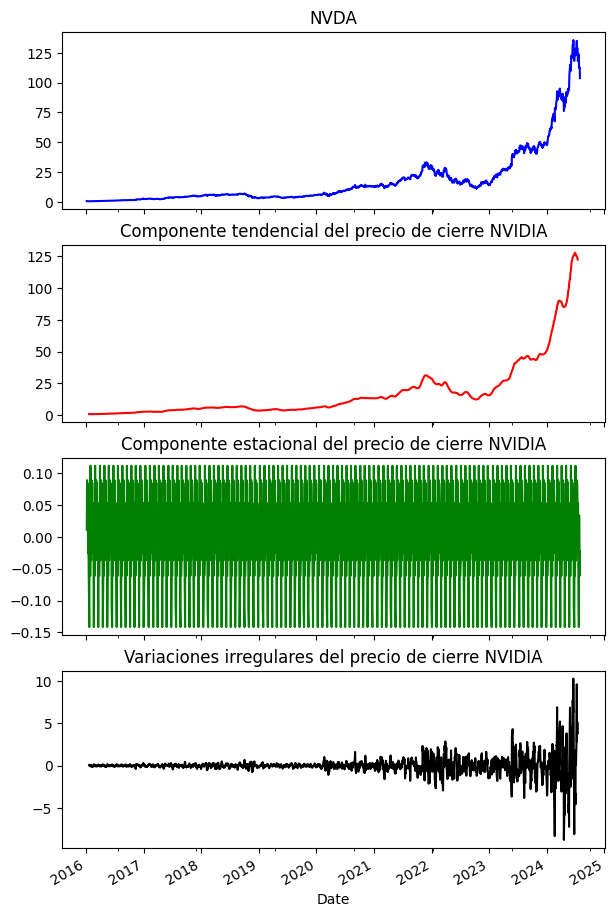

In [ ]:
fig, axarr = plt.subplots(4, sharex = True)
fig.set_size_inches(7, 12)

data['Adj Close'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('NVDA')

pd.Series(data=decompose_model.trend, index=data.index).plot(color='r',
                                                             ax=axarr[1], linestyle='-')
axarr[1].set_title('Componente tendencial del precio de cierre NVIDIA')

pd.Series(data=decompose_model.seasonal, index=data.index).plot(color='g',
linestyle='-', ax=axarr[2])
axarr[2].set_title('Componente estacional del precio de cierre NVIDIA')

pd.Series(data=decompose_model.resid, index=data.index).plot(color='k',
linestyle='-', ax=axarr[3])
axarr[3].set_title('Variaciones irregulares del precio de cierre NVIDIA')


In [ ]:
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]],autolag='AIC')
print('p-val de la prueba ADF sobre variaciones irregulares en los datos del precio NVDA:',
adf_result[1])

p-val de la prueba ADF sobre variaciones irregulares en los datos del precio NVDA: 3.616781223995451e-14


Ahora ejecutamos la prueba ADF sobre los residuos del modelo aditivo y obtenemos un
valor de **0.3042854398253116**, que es todavía mayor que el obtenido con la serie temporal original.

Esto significa que aún hay patrones no estacionarios en los residuos, lo cual podría dificultar la aplicación de ciertos modelos de series temporales como ARIMA, que asumen estacionariedad.

## Modelo Arima

### Diferenciación

<ipython-input-24-4c687820e648>:23: UserWarning:

FixedFormatter should only be used together with FixedLocator



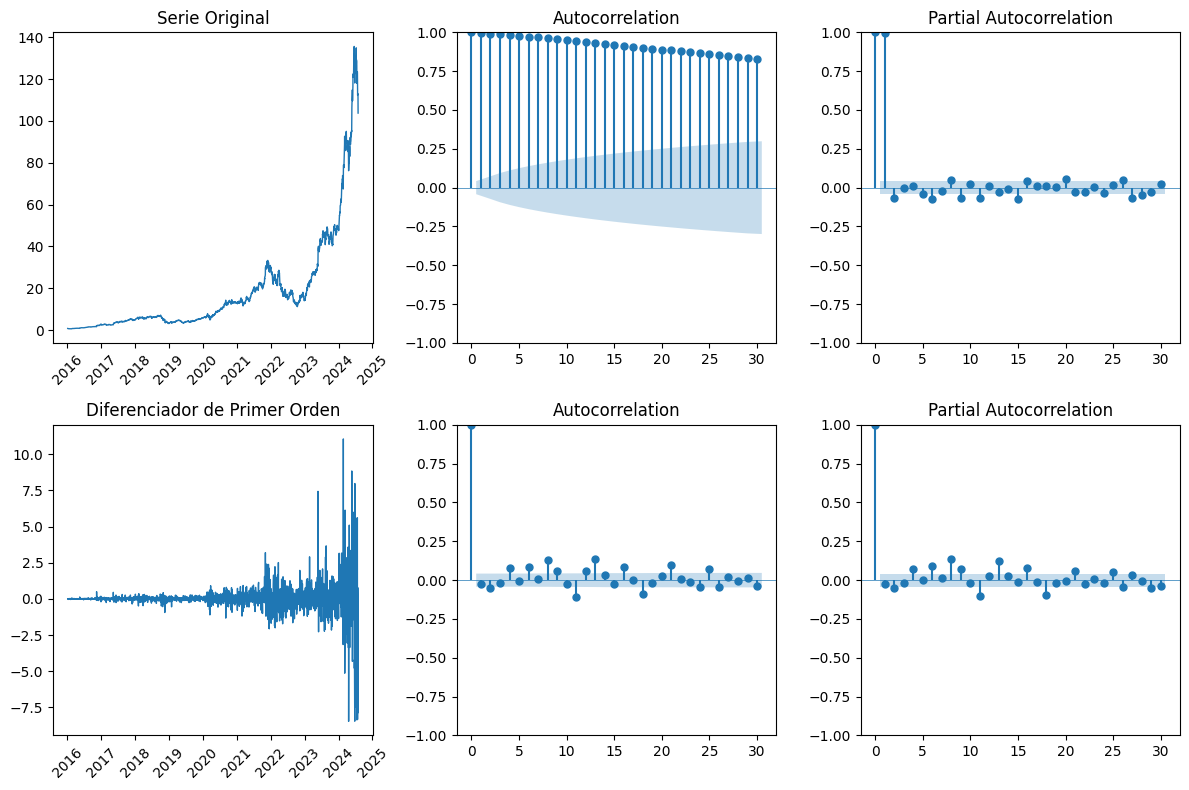

In [ ]:
plt.rcParams.update({'text.usetex'     : False})
plt.rcParams.update({'figure.figsize'  : (12, 8)})

nlag = 30
fig, axes = plt.subplots(2, 3, sharex = False)

# Serie Original
axes[0, 0].plot(data.index, data['Adj Close'], linewidth = 1)
axes[0, 0].set_title('Serie Original')
plot_acf(data["Adj Close"], lags = nlag, linewidth = 0.5, ax = axes[0, 1])
plot_pacf(data["Adj Close"], lags = nlag, linewidth = 0.5, ax = axes[0, 2])

# Diferenciador de Primer Orden
axes[1, 0].plot(data.index, data['Adj Close'].diff(), linewidth = 1)
axes[1, 0].set_title('Diferenciador de Primer Orden')
plot_acf(data["Adj Close"].diff().dropna(), lags = nlag, linewidth = 0.5, ax = axes[1, 1])
plot_pacf(data["Adj Close"].diff().dropna(), lags = nlag, linewidth = 0.5, ax = axes[1, 2])

# Rotar los valores del eje x solo para las gráficas de las series temporales
for ax in [axes[0, 0], axes[1, 0]]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

plt.tight_layout()
plt.show()

#### Descomposición del modelo diferenciado

Observamos la descomposición de componentes para analizar gráficamente la tendencia de la serie temporal con una diferenciación, inicialmente se muestra laa grafica de la serie de tiempo diferencada, la segunda gráfica muestra su componente tendencial, la siguiente grafica su componente estacionario y finalmente la grafica que muestra las variaciones irregulares.

In [ ]:
# Convert the data to a list and remove any NaN values
data_list = [x for x in data["Adj Close"].diff().tolist() if np.isfinite(x)]

# Perform seasonal decomposition on the list without NaN values
decompose_model = seasonal.seasonal_decompose(data_list, period=20, model='additive')

Text(0.5, 1.0, 'Variaciones irregulares del precio de cierre NVIDIA')

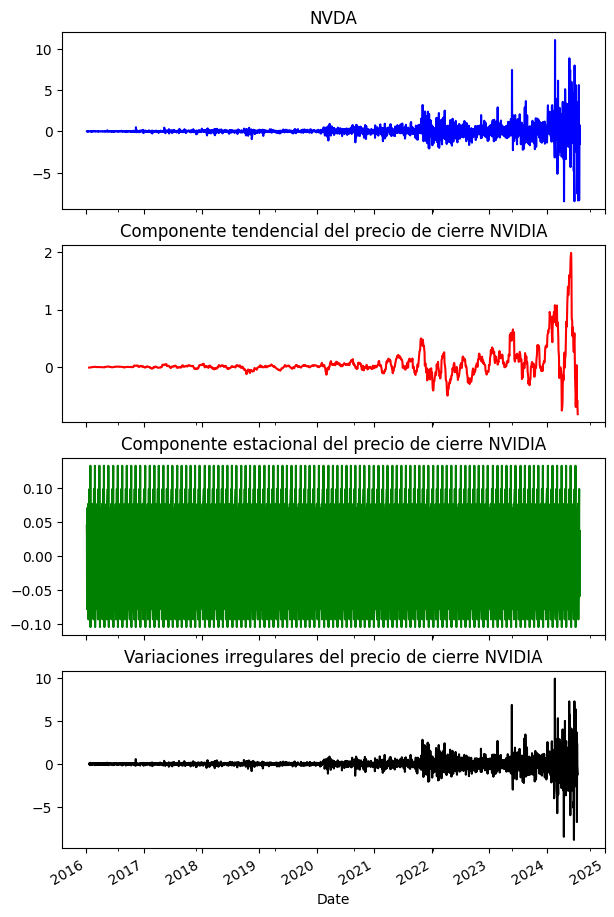

In [ ]:
fig, axarr = plt.subplots(4, sharex = True)
fig.set_size_inches(7, 12)

# Slice data['Adj Close Diff'] to match the length of decompose_model.trend
data['Adj Close'].diff()[:-1].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('NVDA')

pd.Series(data=decompose_model.trend, index=data.index[:-1]).plot(color='r',
                                                             ax=axarr[1], linestyle='-')
axarr[1].set_title('Componente tendencial del precio de cierre NVIDIA')

pd.Series(data=decompose_model.seasonal, index=data.index[:-1]).plot(color='g',
linestyle='-', ax=axarr[2])
axarr[2].set_title('Componente estacional del precio de cierre NVIDIA')

pd.Series(data=decompose_model.resid, index=data.index[:-1]).plot(color='k',
linestyle='-', ax=axarr[3])
axarr[3].set_title('Variaciones irregulares del precio de cierre NVIDIA')

#### Método gráfico de normalidad

En la figura siguiente se muestra el gráfico qqplot para visualizar la normalidad del conjunto valores irregulares de datos
NVDA.

**Método gráfico**

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



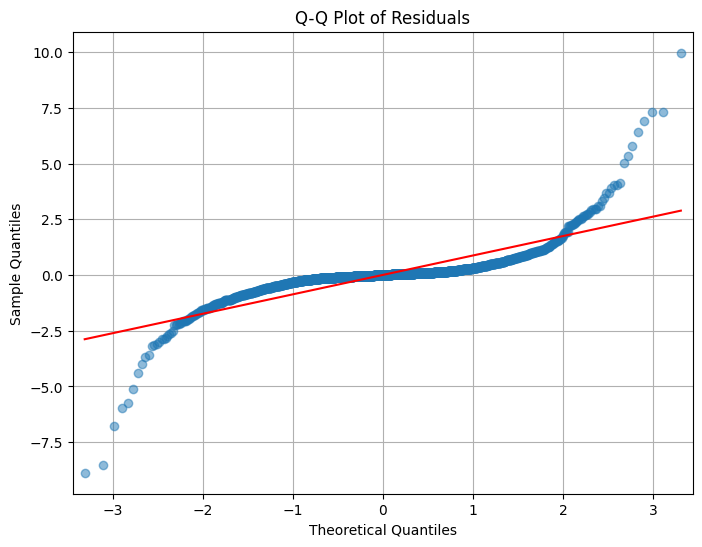

In [ ]:
decompose_model = seasonal.seasonal_decompose(data['Adj Close'].diff().fillna(0), period=20, model='additive')

plt.rcParams.update({'figure.figsize': (8, 6)})
fig = sm.qqplot(decompose_model.resid.dropna(), line='s', alpha=0.5, color='b', lw=2)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.grid(True)
plt.show()

La figura anterior no muestra un indicio de normalidad significativa en el conjunto de datos residuales de NVD.

### Método Analítico

La normalidad también puede evaluarse mediante la prueba de **Shapiro-Wilk** para la presencia de una normalidad se plantean las siguientes hipótesis

 **H0 :  La muestra parece provenir de una distribución normal**

 **H1 : La muestra no parece provenir de una distribución normal**

 Dado que p-value (0.000) < alfa (0.05) se concluye que los residuos del modelo posterior a la primera diferenciación de la muestra no provienen de una distribución normal. Por lo tanto no se cumple el supuesto de normalidad en los residuos de la serie temporal.

#### Prueba de Normalidad

In [ ]:
resid_clean = np.where(np.isinf(decompose_model.resid), np.nan, decompose_model.resid)
resid_clean = resid_clean[~np.isnan(resid_clean)]

# Realizar la prueba de Shapiro-Wilk
stat, p = shapiro(resid_clean)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretación de los resultados
alpha = 0.05
if p > alpha:
    print('La muestra parece normal (no se rechaza H0)')
else:
    print('La muestra no parece normal (se rechaza H0)')

Statistics=0.652, p=0.000
La muestra no parece normal (se rechaza H0)


ADF Statistic (Diferenciada): -6.581074
p-value (Diferenciada): 0.000000
La serie diferenciada es estacionaria (p-valor < 0.05)


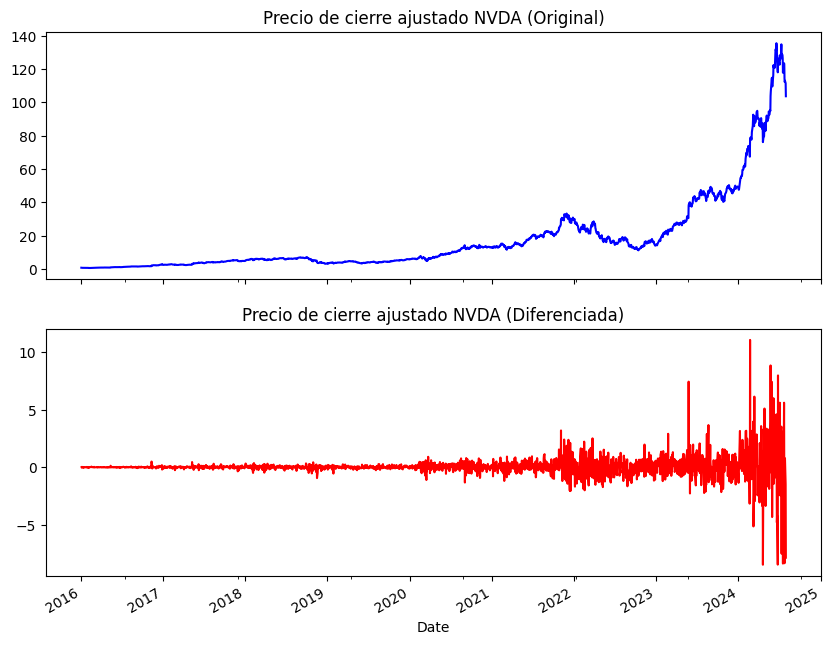

In [ ]:
# 1. Diferenciar la serie
data['Adj Close Diff'] = data['Adj Close'].diff().dropna()

# 2. Realizar la prueba ADF en la serie diferenciada
adf_result_diff = adfuller(data['Adj Close Diff'].dropna())
print('ADF Statistic (Diferenciada): %f' % adf_result_diff[0])
print('p-value (Diferenciada): %f' % adf_result_diff[1])

# 3. Evaluar si la serie diferenciada es estacionaria
if adf_result_diff[1] < 0.05:
    print("La serie diferenciada es estacionaria (p-valor < 0.05)")
else:
    print("La serie diferenciada no es estacionaria (p-valor >= 0.05)")

# 4. Visualizar la serie original y la serie diferenciada
fig, axarr = plt.subplots(2, sharex=True, figsize=(10, 8))

# Serie original
data['Adj Close'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Precio de cierre ajustado NVDA (Original)')

# Serie diferenciada
data['Adj Close Diff'].plot(ax=axarr[1], color='r')
axarr[1].set_title('Precio de cierre ajustado NVDA (Diferenciada)')

plt.show()

#### **Optimización del modelo de ARIMA por medio de los criterios AIC, BIC, HQIC**




#### Ajuste del modelo ARIMA

**División de los conjuntos de entrenamiento y validación**

In [ ]:
n_data = len(data['Adj Close'])
n_test = 30
train_size = n_data - n_test

In [ ]:
train= data['Adj Close'][:train_size]
dates_train = data['fecha'][:train_size]

test = data['Adj Close'][train_size:train_size + n_test]
dates_test = data['fecha'][train_size:train_size + n_test]

print("Train:", train.shape)
print("Test:", test.shape)

Train: (2127,)
Test: (30,)


In [ ]:
train_list = train.tolist()

test7 = data['Adj Close'][train_size:train_size + 7]
dates_test7 = data['fecha'][train_size:train_size + 7]
test7 = test7.tolist()

test14 = data['Adj Close'][train_size:train_size + 14]
dates_test14 = data['fecha'][train_size:train_size + 14]
test14 = test14.tolist()

test21 = data['Adj Close'][train_size:train_size + 21]
dates_test21 = data['fecha'][train_size:train_size + 21]
test21 = test21.tolist()

test28 = data['Adj Close'][train_size:train_size + 28]
dates_test28 = data['fecha'][train_size:train_size + 28]
test28 = test28.tolist()

Se utilizará el método de máxima verosimilitud method = 'mle' exacta a través del filtro de Kalman.

- `p:` Corresponde al orden de la parte autoregresiva del modelo (AR) e indican el número de observaciones pasadas (lags) que s eutilizan para predecir el valor actual de la serie.
- `d:` Corresponden al número de diferenciaciones que se realizan en la serie para convertirla en estacionaria.
- `q:` Corresponde al orden de la parte de media móvil del modelo(MA) y representa cuántos errores pasados están influyendo en el valor presente de la serie.

In [ ]:
train_df = data[["Adj Close"]][:train_size]
test_df = data[["Adj Close"]][train_size:train_size + n_test]

In [ ]:
# Inicialización de las variables
best_aic = np.inf
best_bic = np.inf
best_order = None
best_mdl = None

pq_range = range(5)  # Rango para p y q
d_range = range(3)   # Rango para d

# Almacenar los resultados
lags = []
dif = []
ave = []
aic = []
bic = []
hqic = []

# Bucle para ajustar modelos con diferentes combinaciones de parámetros
for i in pq_range:
    for j in d_range:
        for k in pq_range:
            try:
                # Ajustamos el modelo ARIMA
                tmp_mdl = ARIMA(train, order=(i, j, k)).fit()

                # Almacenamos los resultados
                lags.append(i)
                dif.append(j)
                ave.append(k)
                aic.append(tmp_mdl.aic)
                bic.append(tmp_mdl.bic)
                hqic.append(tmp_mdl.hqic)

                # Verificamos si el modelo actual tiene un AIC más bajo que el mejor hasta ahora
                if tmp_mdl.aic < best_aic:
                    best_aic = tmp_mdl.aic
                    best_order = (i, j, k)  # Actualizamos el mejor orden
                    best_mdl = tmp_mdl      # Actualizamos el mejor modelo

            except Exception as e:
                # Manejo silencioso de excepciones
                continue

# Creación del DataFrame con los resultados
results = pd.DataFrame({
    'lags': lags,
    'dif': dif,
    'ave': ave,
    'aic': aic,
    'bic': bic,
    'hqic': hqic
})

# Mostrar los mejores resultados
print(f"Mejor AIC: {best_aic} para el orden {best_order}")

# Ahora ajustamos el modelo final utilizando el mejor orden basado en AIC
if best_order is not None:
    model_aic = ARIMA(train, order=best_order)
    model_fit_aic = model_aic.fit()
    print(model_fit_aic.summary())
else:
    print("No se encontró un modelo adecuado basado en AIC.")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been prov

Mejor AIC: 5056.346090554938 para el orden (3, 2, 4)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2127
Model:                 ARIMA(3, 2, 4)   Log Likelihood               -2520.173
Date:                Sat, 21 Sep 2024   AIC                           5056.346
Time:                        16:31:44   BIC                           5101.638
Sample:                             0   HQIC                          5072.925
                               - 2127                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4399      0.053      8.323      0.000       0.336       0.543
ar.L2          0.0849      0.066      1.284      0.199      -0.045       0.215
ar.L3         -0.8190      0.049    -16.612      0.0

In [ ]:
# Mostrar los resultados ordenados por el mejor AIC
best_results = results.sort_values(by='aic').head(10)
print(best_results)

    lags  dif  ave          aic          bic         hqic
59     3    2    4  5056.346091  5101.638307  5072.925472
69     4    1    4  5057.067896  5108.025874  5075.720805
71     4    2    1  5108.787979  5142.757142  5121.222515
54     3    1    4  5110.656508  5155.952488  5127.236872
74     4    2    4  5110.853739  5161.807483  5129.505543
73     4    2    3  5115.694955  5160.987172  5132.274336
53     3    1    3  5116.216936  5155.850919  5130.724754
39     2    1    4  5117.711861  5157.345844  5132.219680
58     3    2    3  5118.709702  5158.340392  5133.216661
44     2    2    4  5118.746528  5158.377217  5133.253486


Se toma el criterio `AKAIKE (AIC)` para determinar cual es el mejor parámetro a elegir en cada una de las componentes del modelo ARIMA (p, d, q). Sorprendentemente (Dado que la prueba analítica de Dickey Fuller evidenció no estacionariedad en la serie de tiempo y se requería de diferenciación) se recomienda un primer modelo `ARIMA(3,0,3)` con un `AIC = 5918.73796` Y un modelo `ARIMA(4,1,4)` con `AIC = 5923.063807`.

# **Predicción de la serie temporal `NVDA`**

### **Cálculo de métricas**

Para evaluar la precisión de las predicciones en un análisis de series temporales se utilizan las siguientes métricas: Mean Absolute Error (MAE), Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), Root Mean Squared Error (RMSE) y Coeficiente de determinación (R2).

### Mean Absolute Error (MAE):
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |forecast_i - actual_i|
$$

### Mean Squared Error (MSE):
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (forecast_i - actual_i)^2
$$

### Mean Absolute Percentage Error (MAPE):
$$
MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{forecast_i - actual_i}{actual_i} \right|
$$

### Root Mean Squared Error (RMSE):
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (forecast_i - actual_i)^2}
$$

### Coeficiente de determinación (R²):
$$
R^2 = 1 - \frac{\sum (forecast_i - actual_i)^2}{\sum (actual_i - \bar{actual})^2}
$$

In [ ]:
def forecast_accuracy(forecast, actual, str_name):
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
  mae = np.mean(np.abs(forecast - actual))
  rmse = np.mean((forecast - actual)**2)**.5
  mse = np.mean((forecast - actual)**2)
  r2 = r2_score(forecast, actual)

  df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse],
                           'R2': [r2]},
                          index=[str_name])
  return df_acc

## Modelo 1 con AIC - `ARIMA(4,1,4)`

Inicializamos el primer modelo ARIMA con conponentes:
- Autoregresivas: 4
- Diferenciación: 1
- Medias móviles: 4

In [ ]:
def arima_sin_rolling(test, modelo):
  forecast_steps = len(test)
  forecast_tipo = modelo.forecast(steps = forecast_steps)
  forecast_values = forecast_tipo.values

  for i in range(len(test)):
    observado = test[i]
    predicho = forecast_values[i]
    print(f'Predicho: {predicho}, Observado: {observado}')

  return forecast_values

A continuación se ajustará el modelo sin rolling con los mejores parámetros obtenido por el criterio de AKAIKE.

In [ ]:
model_aic = ARIMA(train, order = (4, 1, 4))
model_fit_aic = model_aic.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



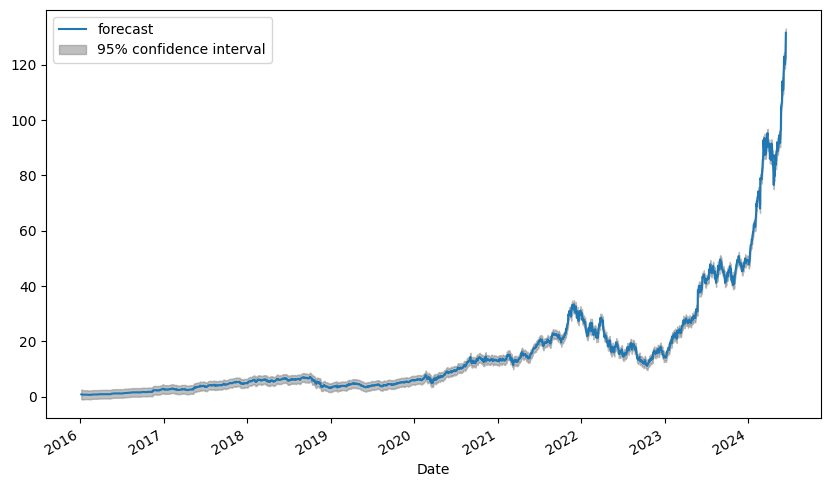

In [ ]:
plt.rcParams.update({'figure.figsize': (10,6)})
plot_predict(model_fit_aic, 2);
# El valor 2 significa que la predicción comenzará desde la segunda observación.
plt.show();

#### Modelo ARIMA sin Rolling AIC

Se utiliza el modelo ajustado con AIC (Criterio de Información de Akaike) para predecir los valores futuros en diferentes horizontes temporales (7, 14, 21, y 28 días). En lugar de recalibrar el modelo después de cada nuevo punto de predicción, el modelo ARIMA se ajusta una vez y se usa para hacer predicciones a varios horizontes de tiempo (7, 14, 21 y 28 días).

1. `Horizontes de predicción:` Se realizan predicciones a distintos intervalos de tiempo:

- Horizonte de 7 días
- Horizonte de 14 días
- Horizonte de 21 días
- Horizonte de 28 días

In [ ]:
print('ARIMA sin Rolling AIC - Horizonte de 7 días.')
yhat7_sin_aic = arima_sin_rolling(test7, model_fit_aic)

print('\nARIMA sin Rolling AIC - Horizonte de 14 días.')
yhat14_sin_aic = arima_sin_rolling(test14, model_fit_aic)

print('\nARIMA sin Rolling AIC - Horizonte de 21 días.')
yhat21_sin_aic = arima_sin_rolling(test21, model_fit_aic)

print('\nARIMA sin Rolling AIC - Horizonte de 28 días')
yhat28_sin_aic = arima_sin_rolling(test28, model_fit_aic)

ARIMA sin Rolling AIC - Horizonte de 7 días.
Predicho: 132.5288161873831, Observado: 130.9687957763672
Predicho: 132.1866883846547, Observado: 135.5684051513672
Predicho: 131.5290457845295, Observado: 130.76881408691406
Predicho: 131.78808899564336, Observado: 126.55917358398438
Predicho: 133.2038740275103, Observado: 118.0998992919922
Predicho: 135.51832111344044, Observado: 126.07920837402344
Predicho: 137.52682058427007, Observado: 126.38919067382812

ARIMA sin Rolling AIC - Horizonte de 14 días.
Predicho: 132.5288161873831, Observado: 130.9687957763672
Predicho: 132.1866883846547, Observado: 135.5684051513672
Predicho: 131.5290457845295, Observado: 130.76881408691406
Predicho: 131.78808899564336, Observado: 126.55917358398438
Predicho: 133.2038740275103, Observado: 118.0998992919922
Predicho: 135.51832111344044, Observado: 126.07920837402344
Predicho: 137.52682058427007, Observado: 126.38919067382812
Predicho: 138.56774026837084, Observado: 123.9793930053711
Predicho: 138.366042003

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



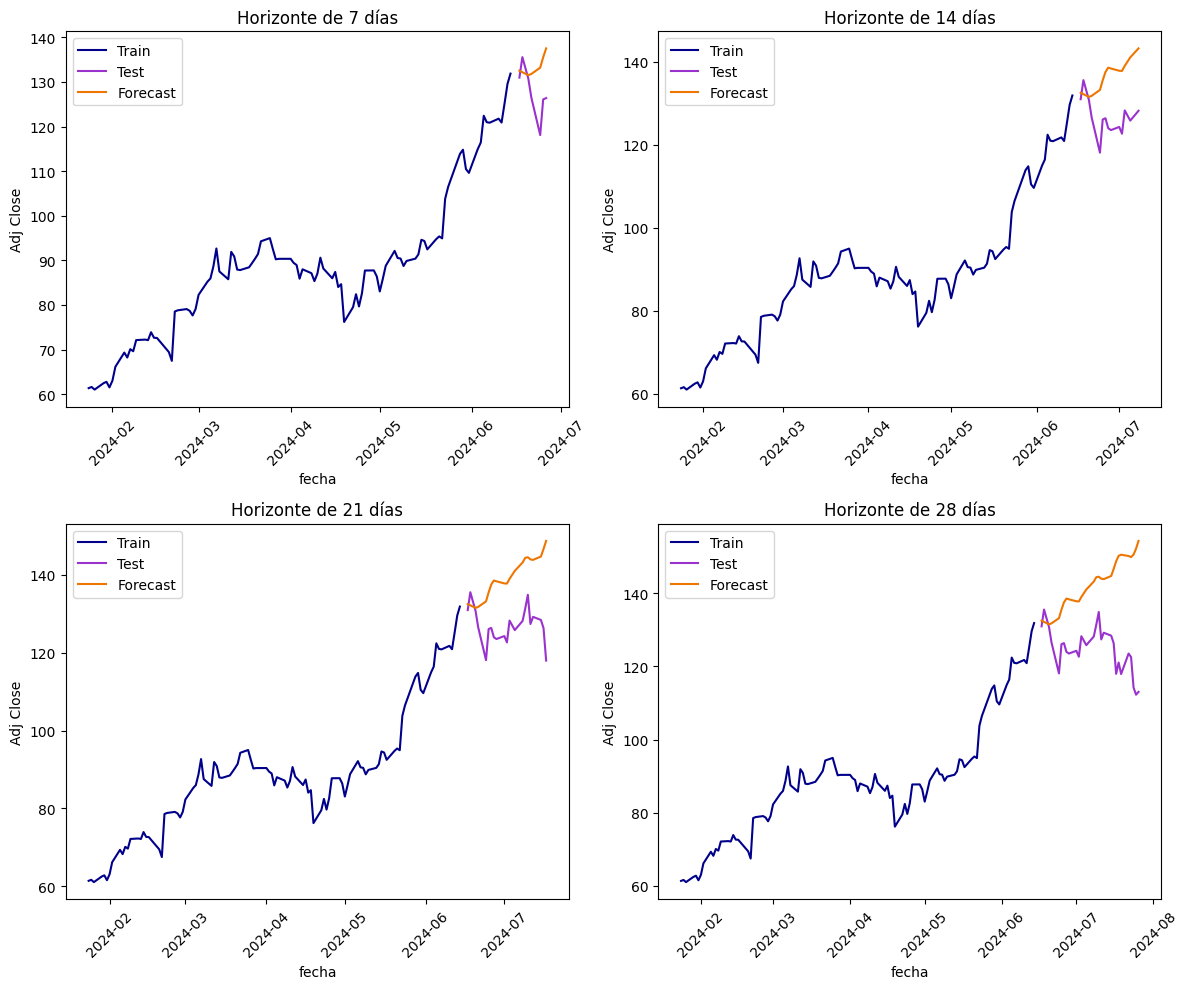

In [ ]:
fig , axs = plt.subplots(2 , 2 , figsize = (12 , 10))

# Horizonte de 7 días
sns.lineplot(ax = axs[0 , 0] , x = dates_train[-100:] , y = train[-100:] , label = "Train" , color = '#00008B')
sns.lineplot(ax = axs[0 , 0] , x = dates_test7 , y = test7 , label = "Test" , color = '#9A32CD')
sns.lineplot(ax = axs[0 , 0] , x = dates_test7 , y = yhat7_sin_aic , label = "Forecast" , color = '#EE7600')
axs[0 , 0].set_title("Horizonte de 7 días")
axs[0 , 0].tick_params(axis = 'x' , rotation = 45)

# Horizonte de 14 días
sns.lineplot(ax = axs[0 , 1] , x = dates_train[-100:] , y = train[-100:] , label = "Train" , color = '#00008B')
sns.lineplot(ax = axs[0 , 1] , x = dates_test14 , y = test14 , label = "Test" , color = '#9A32CD')
sns.lineplot(ax = axs[0 , 1] , x = dates_test14 , y = yhat14_sin_aic , label = "Forecast" , color = '#EE7600')
axs[0 , 1].set_title("Horizonte de 14 días")
axs[0 , 1].tick_params(axis = 'x' , rotation = 45)

# Horizonte de 21 días
sns.lineplot(ax = axs[1 , 0] , x = dates_train[-100:] , y = train[-100:] , label = "Train" , color = '#00008B')
sns.lineplot(ax = axs[1 , 0] , x = dates_test21 , y = test21 , label = "Test" , color = '#9A32CD')
sns.lineplot(ax = axs[1 , 0] , x = dates_test21 , y = yhat21_sin_aic , label = "Forecast" , color = '#EE7600')
axs[1 , 0].set_title("Horizonte de 21 días")
axs[1 , 0].tick_params(axis = 'x' , rotation = 45)

# Horizonte de 28 días
sns.lineplot(ax = axs[1 , 1] , x = dates_train[-100:] , y = train[-100:] , label = "Train" , color = '#00008B')
sns.lineplot(ax = axs[1 , 1] , x = dates_test28 , y = test28 , label = "Test" , color = '#9A32CD')
sns.lineplot(ax = axs[1 , 1] , x = dates_test28 , y = yhat28_sin_aic , label = "Forecast" , color = '#EE7600')
axs[1 , 1].set_title("Horizonte de 28 días")
axs[1 , 1].tick_params(axis = 'x' , rotation = 45)

plt.tight_layout()
plt.show()

**Descripción de la estimación**
- `Horizonte de 7 días:` El modelo muestra un ajuste razonablemente preciso en este horizonte corto. Las predicciones siguen la tendencia de los valores reales, pero con una notable tendencia a sobrestimar los valores hacia el final del período.

- `Horizonte de 14 días:` Al extender el horizonte a 14 días, las predicciones comienzan a mostrar una mayor separación de los valores reales. sta desviación creciente indica que el modelo ARIMA ajustado no logra capturar completamente la variabilidad que se observa en los datos reales para este horizonte más largo.

- `Horizonte de 21 días:` En el horizonte de 21 días, las predicciones del modelo ARIMA se desvían significativamente de los valores observados. La tendencia ascendente aún se mantiene, pero las predicciones continúan sobreestimando los precios reales, con una diferencia más notoria. A medida que se avanza hacia el final de este horizonte, el modelo parece perder más precisión, sugiriendo que a partir de este punto, el error acumulado empieza a ser considerable.

- `Horizonte de 28 días: `Finalmente, la sobreestimación es clara y constante en el horizonte de 28 días ya que el modelo presenta la mayor diferencia con respecto a los valores reales. Aunque la dirección general de la tendencia se mantiene, las predicciones se alejan aún más de los datos observados.

### Modelo ARIMA usando Rolling Forecast AIC

Este modelo realiza un pronóstico "rolling" utilizando ARIMA, recalibrando el modelo después de cada predicción. Se ajusta el modelo en los datos históricos, predice un valor y luego incorpora la observación real para la siguiente predicción, mejorando la precisión a corto plazo.

In [ ]:
def arima_rolling(history, test, best_order, solver='lbfgs', maxiter=500):
    predictions = []  # Lista donde se almacenarán las predicciones

    # Recorrer el conjunto de prueba
    for t in range(len(test)):
        try:
            # Suprimir advertencias para evitar que los mensajes llenen la salida
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")

                # Crear y ajustar un modelo ARIMA con los datos históricos
                model = ARIMA(history, order=best_order)
                model_fit = model.fit(method_kwargs={'maxiter': maxiter, 'solver': solver})  # Método correcto de paso de parámetros

                # Generar pronóstico para el siguiente valor (1 paso adelante)
                output = model_fit.forecast()
                yhat = output[0]  # El pronóstico es el primer valor del forecast

                predictions.append(yhat)  # Almacenar la predicción en la lista

                # Obtener el valor real observado en el conjunto de prueba
                obs = test[t]

                # Añadir la observación actual al conjunto de datos históricos
                history.append(obs)

                # Imprimir el valor pronosticado y el valor real
                print('predicho = %f, esperado = %f' % (yhat, obs))

        except Exception as e:
            print(f"Error al ajustar el modelo ARIMA: {e}")
            continue

    return predictions

In [ ]:
print('ARIMA Rolling AIC- Horizonte de 7 días.')
yhat7_aic = arima_rolling(train_list, test7, (4, 1, 4)) # Changed best_aic to best_order_aic

print('\nARIMA Rolling AIC - Horizonte de 14 días.')
yhat14_aic = arima_rolling(train_list, test14, (4, 1, 4))

print('\nARIMA Rolling AIC - Horizonte de 21 días.')
yhat21_aic = arima_rolling(train_list, test21, (4, 1, 4))

print('\nARIMA Rolling AIC - Horizonte de 28 días.')
yhat28_aic = arima_rolling(train_list, test28, (4, 1, 4))

ARIMA Rolling AIC- Horizonte de 7 días.
predicho = 132.451874, esperado = 130.968796
predicho = 130.583317, esperado = 135.568405
predicho = 135.199710, esperado = 130.768814
predicho = 130.566809, esperado = 126.559174
predicho = 127.719373, esperado = 118.099899
predicho = 119.684277, esperado = 126.079208
predicho = 129.010379, esperado = 126.389191

ARIMA Rolling AIC - Horizonte de 14 días.
predicho = 127.241498, esperado = 130.968796
predicho = 130.775087, esperado = 135.568405
predicho = 133.943214, esperado = 130.768814
predicho = 129.485651, esperado = 126.559174
predicho = 126.263988, esperado = 118.099899
predicho = 119.736663, esperado = 126.079208
predicho = 128.484712, esperado = 126.389191
predicho = 128.886614, esperado = 123.979393
predicho = 123.685228, esperado = 123.529434
predicho = 121.696063, esperado = 124.289368
predicho = 122.393780, esperado = 122.659508
predicho = 121.923556, esperado = 128.269028
predicho = 129.991184, esperado = 125.819237
predicho = 125.41

#### Predicciones graficamente

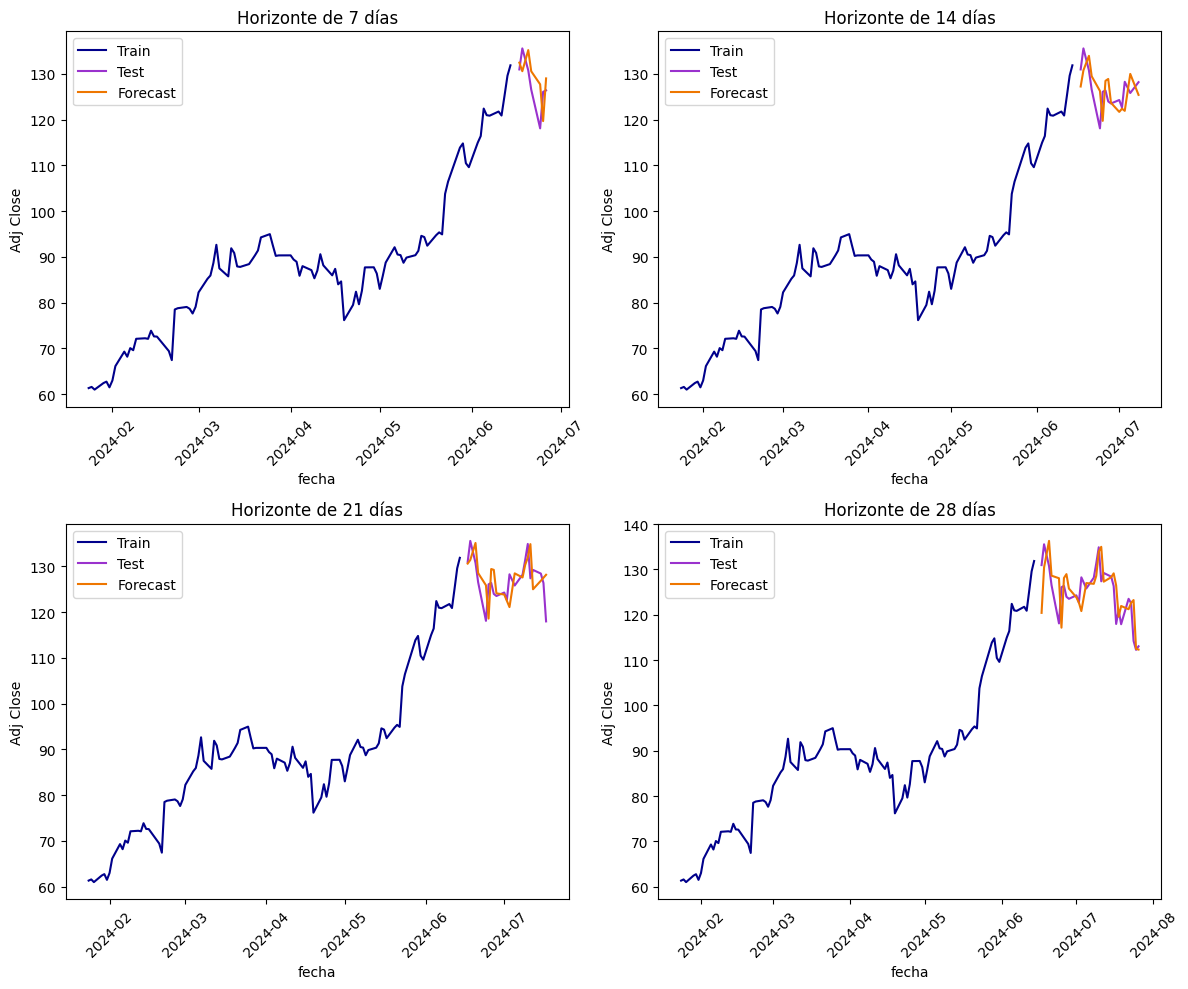

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# -100: seleccionar los últimos 100 elementos.

# Horizonte de 7 días
sns.lineplot(ax = axs[0, 0], x = dates_train[-100:], y = train[-100:], label = 'Train', color = '#00008B')
sns.lineplot(ax = axs[0, 0], x = dates_test7, y = test7, label = 'Test', color = '#9A32CD')
sns.lineplot(ax = axs[0, 0], x = dates_test7, y = yhat7_aic, label = 'Forecast', color = '#EE7600')
axs[0, 0].set_title('Horizonte de 7 días')
axs[0, 0].tick_params(axis = 'x', rotation = 45)

# Horizonte de 14 días
sns.lineplot(ax = axs[0, 1], x = dates_train[-100:], y = train[-100:], label = 'Train', color = '#00008B')
sns.lineplot(ax = axs[0, 1], x = dates_test14, y = test14, label = 'Test', color = '#9A32CD')
sns.lineplot(ax = axs[0, 1], x = dates_test14, y = yhat14_aic, label = 'Forecast', color = '#EE7600')
axs[0, 1].set_title('Horizonte de 14 días')
axs[0, 1].tick_params(axis = 'x', rotation = 45)

# Horizonte de 21 días
sns.lineplot(ax = axs[1, 0], x = dates_train[-100:], y = train[-100:], label = 'Train', color = '#00008B')
sns.lineplot(ax = axs[1, 0], x = dates_test21, y = test21, label = 'Test', color = '#9A32CD')
sns.lineplot(ax = axs[1, 0], x = dates_test21, y = yhat21_aic, label = 'Forecast', color = '#EE7600')
axs[1, 0].set_title('Horizonte de 21 días')
axs[1, 0].tick_params(axis = 'x', rotation = 45)

# Horizonte de 28 días
sns.lineplot(ax = axs[1, 1], x = dates_train[-100:], y = train[-100:], label = 'Train', color = '#00008B')
sns.lineplot(ax = axs[1, 1], x = dates_test28, y = test28, label = 'Test', color = '#9A32CD')
sns.lineplot(ax = axs[1, 1], x = dates_test28, y = yhat28_aic, label = 'Forecast', color = '#EE7600')
axs[1, 1].set_title('Horizonte de 28 días')
axs[1, 1].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

- `Horizonte de 7 días:`
El modelo con rolling muestra una mejora notable en comparación con el enfoque sin recalibración. Las predicciones siguen de cerca los valores reales, y aunque hay pequeñas diferencias, la precisión es bastante alta. La tendencia y la variabilidad de los datos se capturan adecuadamente en este horizonte corto.

- `Horizonte de 14 días:`
A los 14 días, el modelo sigue logrando un ajuste razonablemente bueno. Aunque las predicciones comienzan a separarse ligeramente de los valores reales en algunos puntos, el uso del rolling forecast ayuda a mantener la precisión general. La dirección de la tendencia sigue siendo correctamente identificada y las desviaciones son menores que en el enfoque sin rolling.

- `Horizonte de 21 días:`
En el horizonte de 21 días, las predicciones siguen representando bien la dirección general de la tendencia, pero comienzan a mostrar más desviaciones en comparación con los datos reales.

- `Horizonte de 28 días:`
Para el horizonte más largo, de 28 días, el modelo muestra una leve desviación en varios puntos, aunque sigue manteniendo la tendencia general de los datos reales.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



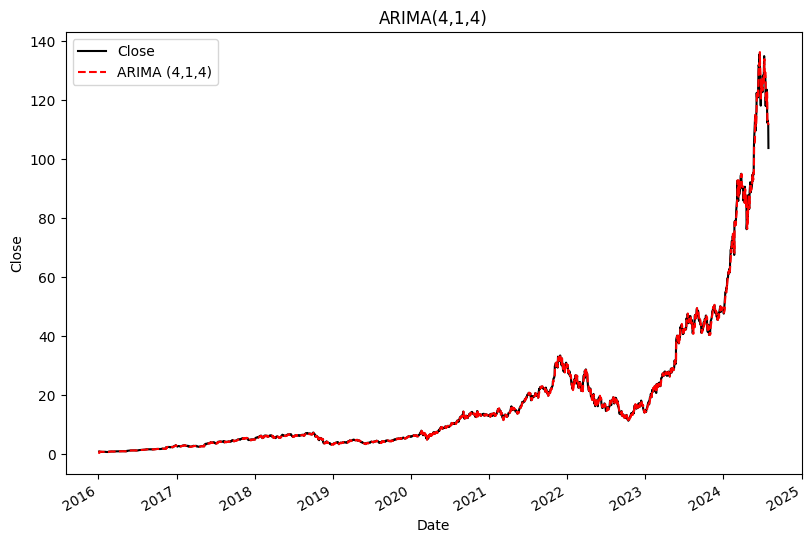

In [ ]:
# Set the best order for ARIMA (4, 1, 4)
best_order = (4, 1, 4)

# Fit the ARIMA model on the 'Adj Close' column (ensuring missing values are dropped)
model = ARIMA(data['Adj Close'].dropna(), order=best_order)
model_fit = model.fit()

# Store the fitted values in the dataframe
data['ARIMA'] = model_fit.fittedvalues

# Create the plot for actual vs. ARIMA(4,1,4) predictions
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(9.5, 6.5)
data['Close'].plot(color='k', linestyle='-', ax=axarr, label='Close')
data['ARIMA'].plot(color='r', linestyle='--', ax=axarr, label='ARIMA (4,1,4)')
axarr.set_title('ARIMA(4,1,4)')
plt.xlabel('Date')
plt.ylabel('Close')

# Display the legend
axarr.legend()
plt.show()

El modelo ARIMA sigue muy de cerca los movimientos de la serie de tiempo a lo largo del período completo. Esto sugiere que el modelo captura de manera adecuada la tendencia general y las fluctuaciones a lo largo del tiempo, con una alineación notablemente precisa en la mayor parte de la serie.

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,fecha,Adj Close Diff,ARIMA
Date,,,,,,,,,
2016-01-04,0.80725,0.81450,0.80100,0.80925,0.789858,358076000,2016-01-04,NaN,0.000000
2016-01-05,0.82450,0.83600,0.81250,0.82225,0.802547,490272000,2016-01-05,0.012688,0.789858
2016-01-06,0.80875,0.81250,0.77900,0.78825,0.769361,449344000,2016-01-06,-0.033185,0.802311
2016-01-07,0.76850,0.77375,0.74700,0.75700,0.738860,645304000,2016-01-07,-0.030501,0.769460
2016-01-08,0.76675,0.76750,0.73925,0.74075,0.723000,398472000,2016-01-08,-0.015861,0.740826


#### Verificación de supuestos al Modelo 1 - ARIMA(4, 1, 4)

**Residuos no correlacionados o independientes**

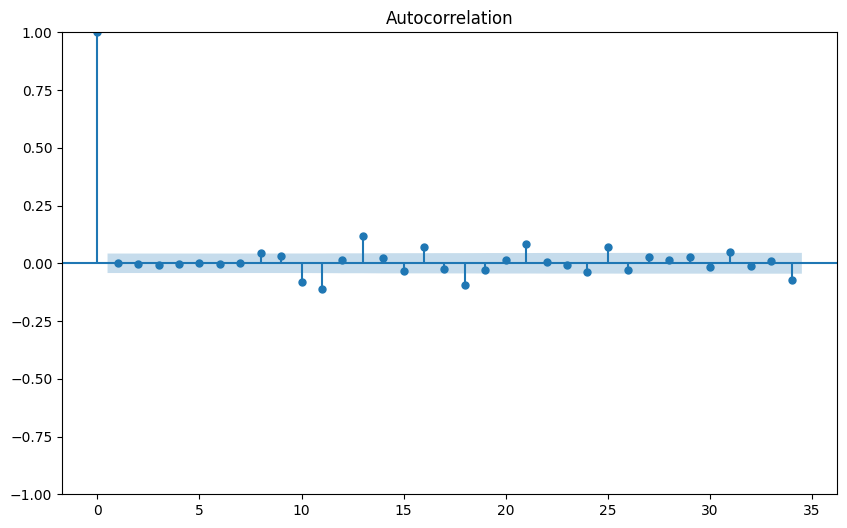

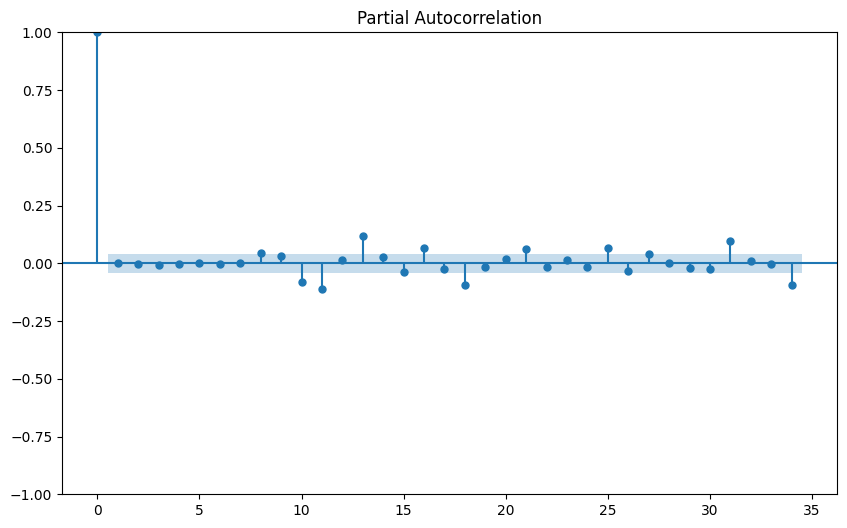

In [ ]:
residuals = model_fit.resid
plot_acf(residuals)
plt.show()

plot_pacf(residuals)
plt.show()



La gráfica de autocorrelación `(ACF) `y autocorrelación parcial `(PACF)` muestra los residuos del modelo ARIMA ajustado, y no presenta correlaciones significativas más allá del primer rezago, lo cual sugiere que los residuos son esencialmente ruido blanco. Esto indica que el modelo ha capturado bien la estructura de la serie temporal, y los residuos no presentan patrones discernibles. En cuanto a la estacionariedad, los residuos parecen ser estacionarios, ya que no muestran tendencias ni autocorrelaciones significativas.

**Normalidad en los residuos**

Estadístico Shapiro-Wilk: 0.6273090484768657
p-valor: 6.176698704265539e-56
Los residuos no parecen seguir una distribuvión normal.


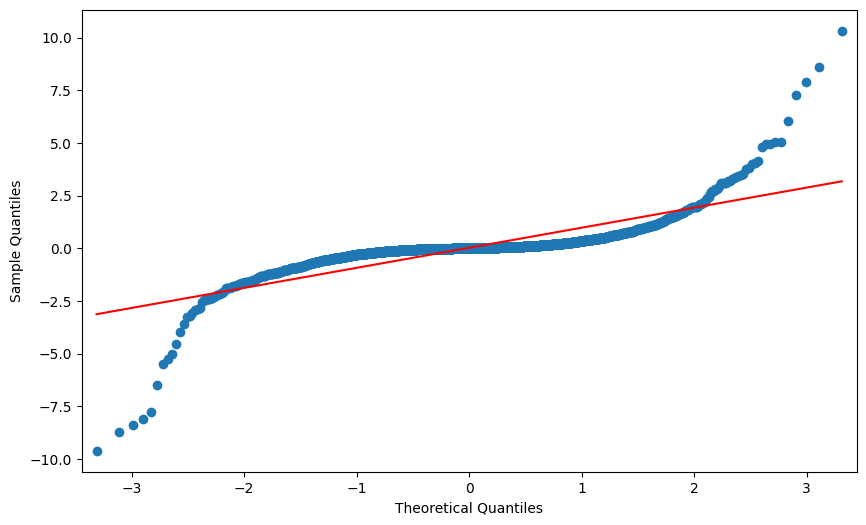

In [ ]:
stats, p_value =shapiro(residuals)
print(f'Estadístico Shapiro-Wilk: {stats}')
print(f'p-valor: {p_value}')

# Si p-valor > 0.05, los residuales son aproximadamente normales
if p_value > 0.05:
    print("Los residuales parecen seguir una distribución normal.")
else:
  print('Los residuos no parecen seguir una distribuvión normal.')

sm.qqplot(residuals, line='s')
plt.show()


El resultado de la prueba Shapiro-Wilk indica que los residuos no siguen una distribución normal (p-valor < 0.05). En el gráfico Q-Q plot, los puntos se desvían significativamente de la línea teórica, confirmando la no normalidad.

**Homocedasticidad de la varianza**

Se observa la grafica de varianza conforme avanza la serie temporal a través del tiempo y se evidencia un aumento constante y considerable de la varianza en las observaciones, por lo que los residuos no son homocedasticos. Además, se observa que los residuos del modelo ARIMA muestra que, aunque los residuos se mantienen cerca de cero en los primeros años, hay un aumento significativo en la volatilidad a partir de 2020, lo que indica que el modelo no captura adecuadamente las variaciones recientes.

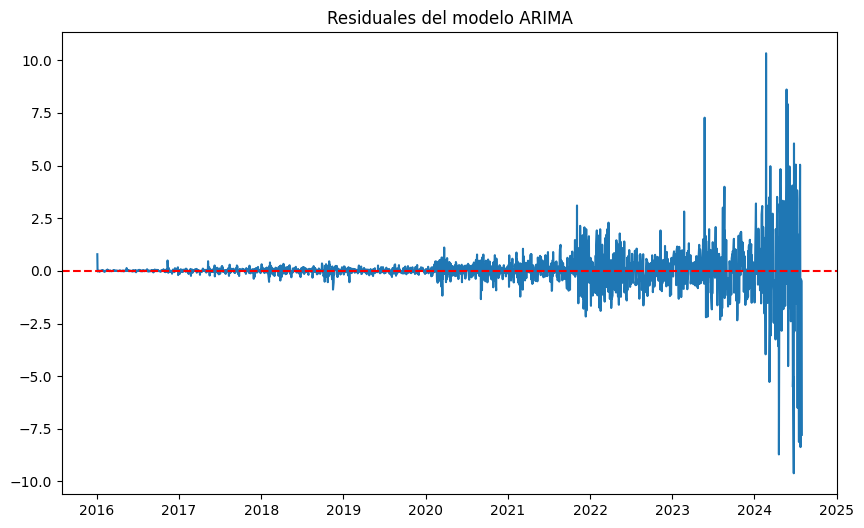

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuales del modelo ARIMA')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

**Ruido Blanco en los residuos**

El resultado de la prueba de Ljung-Box muestra un p-valor de 0.0253, menor que 0.05, lo que indica que los residuos no son ruido blanco. Ruido blanco se refiere a una serie temporal cuyos valores son independientes y no están correlacionados entre sí, es decir, no siguen un patrón. En este caso, al no ser ruido blanco, los residuos del modelo ARIMA contienen patrones o correlaciones no capturadas completamente, lo que sugiere que el modelo podría mejorarse para explicar mejor la variabilidad observada en los datos.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags = [10], return_df = True)
print(lb_test)

      lb_stat  lb_pvalue
10  20.446687     0.0253


### Verificación de estacionariedad para el modelo ARIMA(4, 1, 4)

El resumen estadístico del modelo ARIMA (4,1,4) muestra un buen ajuste, con coeficientes significativos para varios términos AR y MA. El log likelihood es -2954.81 y el AIC es 5927.63, lo que indica un ajuste relativamente eficiente.
 Cabe resaltar que el modelo presenta un buen ajuste general, pero los residuos no siguen una distribución normal (p-valor Jarque-Bera < 0.05). Además, hay heterocedasticidad y cierta correlación residual no capturada completamente.



In [ ]:
import statsmodels.tsa.api as smtsa
arima_obj = smtsa.ARIMA(data['Adj Close'].tolist(), order=(4, 1, 4))
arima_obj_fit = arima_obj.fit()
arima_obj_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2157
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2954.813
Date:                Sat, 21 Sep 2024   AIC                           5927.626
Time:                        17:00:35   BIC                           5978.710
Sample:                             0   HQIC                          5946.312
                               - 2157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0644      0.064      1.008      0.313      -0.061       0.190
ar.L2          1.0535      0.052     20.213      0.000       0.951       1.156
ar.L3          0.0083      0.056      0.147      0.883      -0.102       0.118
ar.L4         -0.2408      0.050     -4.826      0.000      -0.339      -0.143
ma.L1         -0.0988      0.061     -1.632      0.103      -0.218       0.020
ma.L2         -1.1225      0.051    -21.843      0.000      -1.223      -1.022
ma.L3          0.0202      0.052      0.390      0.697      -0.081       0.122
ma.L4          0.3912      0.049      7.978      0.000       0.295       0.487
sigma2         0.9075      0.007    130.269      0.000       0.894       0.921
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            102640.58
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             234.85   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

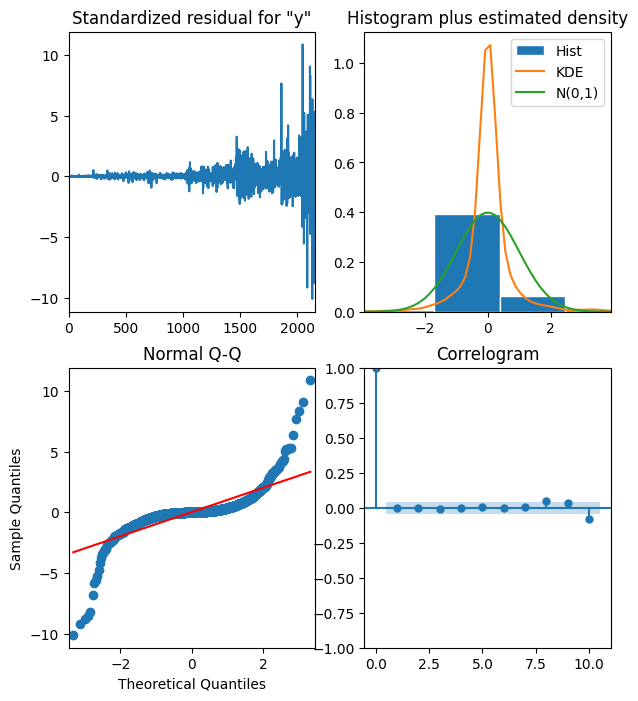

In [ ]:
arima_obj_fit.plot_diagnostics(figsize=(7,8))
plt.show()

- `Arriba a la izquierda:` El grafico muestra una tendencia creciente de la varianza, por lo que los residuos no se consideran homocedasticos.
- `Arriba a la derecha:` Se observa una curva de distribución platicúrtica aproximadamente normal.
- `Abajo a la izquierda:` La grafica muestra que los residuos no siguen una distribución aparentemente normal.
- `Abajo a la derecha:` La grafica correlogram o ACF muestra que los errores residuales posiblemente estpen correlacionados dado la presencia de puntos fuera de la banda de significancia.

#### Tablas de Error

A continuación se mostrarán las métricas de evaluación del modeleo `ARIMA(4, 1, 4)` con base al criterio AIC y la tabla de error con `MAE`, `MSE`, `MAPE`, `RMSE` y `R^2`.

La tabla muestra las métricas de error para el modelo ARIMA (4,1,4) con diferentes horizontes de predicción (7, 14, 21 y 28 días) utilizando un enfoque rolling. El MAE y el RMSE disminuyen ligeramente conforme el horizonte aumenta, indicando un mejor ajuste en horizontes más largos. Sin embargo, el MAPE se mantiene estable en valores bajos, lo que sugiere que el porcentaje de error relativo es constante. El R² es negativo en los horizontes más cortos (7, 14, y 21 días), lo que indica que el modelo no explica bien la variabilidad de los datos. A partir de 28 días, el R² mejora, aunque sigue siendo bajo, con 0.287.

In [ ]:
accuracy7_aic =  forecast_accuracy(np.array(test7), np.array(yhat7_aic), "7 días")
accuracy14_aic = forecast_accuracy(np.array(test14), np.array(yhat14_aic), "14 días")
accuracy21_aic = forecast_accuracy(np.array(test21), np.array(yhat21_aic), "21 días")
accuracy28_aic = forecast_accuracy(np.array(test28), np.array(yhat28_aic), "28 días")

accuracy_rolling = pd.concat([accuracy7_aic, accuracy14_aic, accuracy21_aic, accuracy28_aic])

In [ ]:
accuracy_rolling

,MAE,MSE,MAPE,RMSE,R2
7 días,4.791756,29.006380,0.037415,5.385757,-0.129391
14 días,3.745765,18.790522,0.029663,4.334804,-0.131759
21 días,3.556821,21.149738,0.027918,4.598884,-0.093434
28 días,3.722400,24.977674,0.029659,4.997767,0.287064


El enfoque sin Rolling indica que las métricas MAE y RMSE aumentan significativamente a medida que el horizonte de predicción se alarga, lo que indica un deterioro en la precisión del modelo. El MAPE también crece, mostrando que los errores porcentuales relativos aumentan en horizontes más largos. El R² es negativo para todos los horizontes, lo que indica que el modelo ajustado no explica adecuadamente la variabilidad en los datos, con empeoramiento progresivo a medida que se extiende el horizonte.

In [ ]:
accuracy7_not_aic = forecast_accuracy(np.array(test7), np.array(yhat7_sin_aic), "7 días")
accuracy14_not_aic = forecast_accuracy(np.array(test14), np.array(yhat14_sin_aic), "14 días")
accuracy21_not_aic = forecast_accuracy(np.array(test21), np.array(yhat21_sin_aic), "21 días")
accuracy28_not_aic = forecast_accuracy(np.array(test28), np.array(yhat28_sin_aic), "28 días")

accuracy_not_rolling = pd.concat([ accuracy7_not_aic, accuracy14_not_aic, accuracy21_not_aic, accuracy28_not_aic])

In [ ]:
accuracy_not_rolling

,MAE,MSE,MAPE,RMSE,R2
7 días,6.658800,69.008983,0.049548,8.307165,-1.686931
14 días,10.405690,135.767932,0.075528,11.651950,-7.177345
21 días,12.716727,203.860477,0.089992,14.277972,-9.539514
28 días,17.873651,438.512699,0.122574,20.940695,-11.516437


#### Gráfico de correlación para cada horizonte

El objetivo de esta gráfica es comparar los valores reales con los valores estimados por el modelo ARIMA (4,1,4) para distintos horizontes de predicción: 7, 14, 21 y 28 días. En cada gráfico, la línea diagonal representa la igualdad entre los valores reales y estimados (línea ideal), mientras que los puntos muestran la dispersión de los valores predichos frente a los reales.

Para el horizonte de 7 días, la dispersión es relativamente baja, lo que indica una buena precisión del modelo en este período corto. Sin embargo, conforme se extiende el horizonte a 14, 21, y 28 días, la dispersión de los puntos aumenta, mostrando un deterioro en la calidad de las predicciones. En particular, para el horizonte de 28 días, el modelo subestima o sobreestima varios puntos, lo que refleja un bajo poder predictivo en horizontes largos.








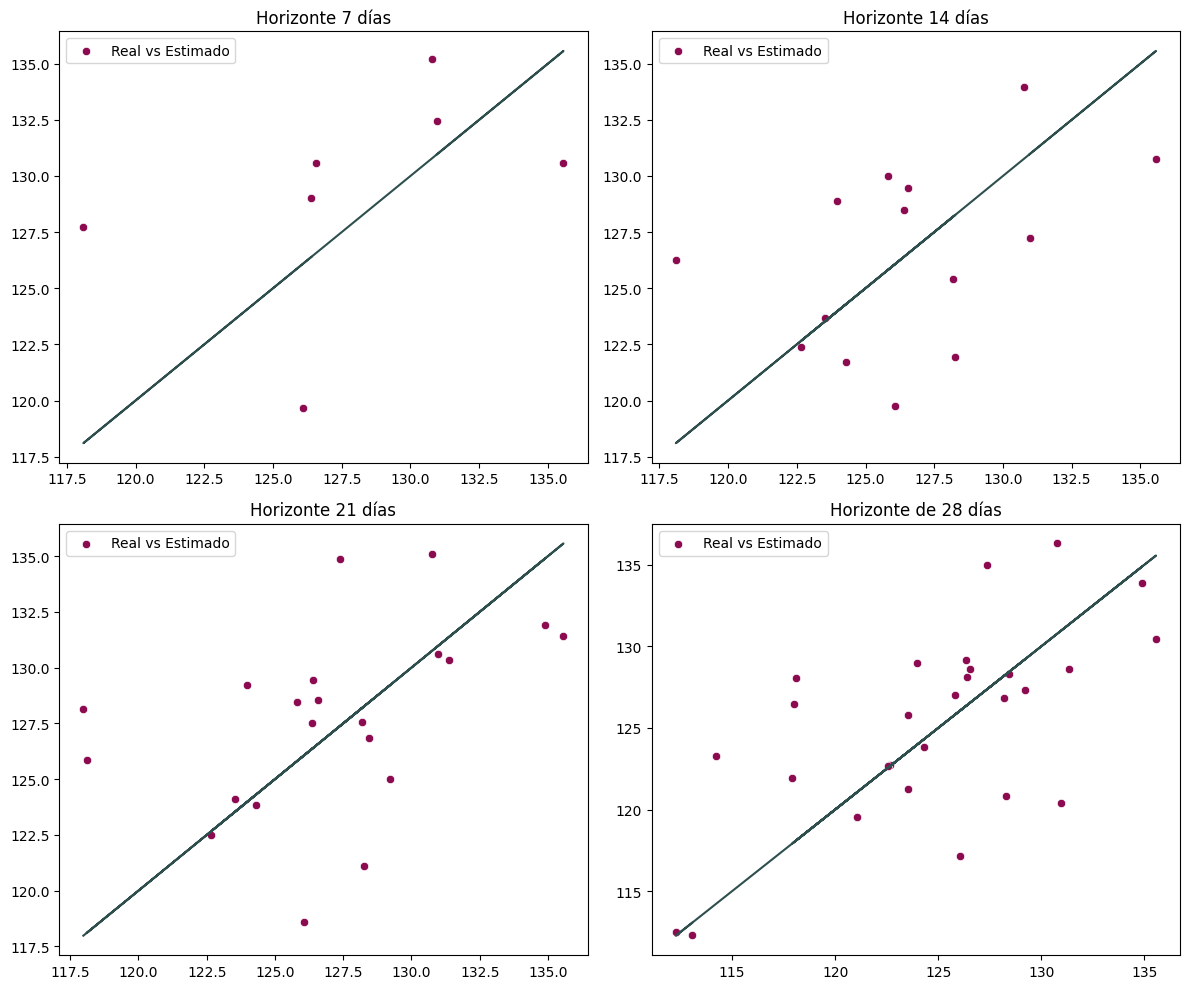

In [ ]:
plt.rcParams.update({'figure.figsize' : (12 , 10)})
fig , axes = plt.subplots(nrows = 2 , ncols = 2)

# Horizonte de 7 días
sns.scatterplot(x = test7 , y = yhat7_aic , ax = axes[0 , 0] , color = '#8B0A50' , label = 'Real vs Estimado')
axes[0 , 0].plot(test7 , test7 , color = '#2F4F4F' , label = 'Correlación')
axes[0 , 0].set_title('Horizonte 7 días' , fontsize = 12)

# Horizonte de 14 días
sns.scatterplot(x = test14 , y = yhat14_aic , ax = axes[0 , 1] , color = '#8B0A50' , label = 'Real vs Estimado')
axes[0 , 1].plot(test14 , test14 , color = '#2F4F4F' , label = 'Correlación')
axes[0 , 1].set_title('Horizonte 14 días' , fontsize = 12)

# Horizonte de 21 días
sns.scatterplot(x = test21 , y = yhat21_aic , ax = axes[1 , 0] , color = '#8B0A50' , label = 'Real vs Estimado')
axes[1 , 0].plot(test21 , test21 , color = '#2F4F4F' , label = 'Correlación')
axes[1 , 0].set_title('Horizonte 21 días' , fontsize = 12)

# Horizonte de 28 días
sns.scatterplot(x = test28 , y = yhat28_aic , ax = axes[1 , 1] , color = '#8B0A50' , label = 'Real vs Estimado')
axes[1 , 1].plot(test28 , test28 , color = '#2F4F4F' , label = 'Correlación')
axes[1 , 1].set_title('Horizonte de 28 días' , fontsize = 12)

plt.tight_layout()
plt.show()

### Conclusiones AIC

El modelo ARIMA con rolling presentó un mejor ajuste en horizontes cortos, como el de 7 días, con errores relativamente bajos (MAE: 4.79, RMSE: 5.38). Sin embargo, el valor de R² es negativo en los primeros horizontes, indicando que la capacidad del modelo para explicar la variabilidad de los datos es limitada.  En el caso del modelo sin rolling, el rendimiento es notablemente peor en todos los horizontes de predicción. Los errores crecen significativamente con el aumento del horizonte, llegando a un MAE de 17.87 y un RMSE de 20.94 para 28 días, lo que indica una mala capacidad predictiva. Además, los valores de R² son extremadamente negativos, lo que sugiere que el modelo sin rolling no logra capturar las dinámicas de la serie temporal adecuadamente.

A través de las pruebas de normalidad y el análisis de ruido blanco, se encontró que los residuos del modelo no siguen una distribución normal y no presentan características de ruido blanco. Esto sugiere que el modelo no está capturando todos los patrones presentes en los datos, lo que podría explicar los errores observados en horizontes más largos.

Para mejorar el ajuste, sería recomendable explorar la introducción de modelos adicionales o ajustes más avanzados, como incorporar técnicas de heterocedasticidad o probar modelos de mayor complejidad que puedan capturar mejor las dinámicas y variabilidad presentes en la serie temporal.

## Modelo 2 BIC y HQIC `ARIMA(3, 2, 4)`
Inicializamos el primer modelo ARIMA con conponentes:
- Autoregresivas: 3
- Diferenciación: 2
- Medias móviles: 4

In [ ]:
model_aic = ARIMA(train, order = (3, 2, 4))
model_fit_aic = model_aic.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



### Modelo ARIMA(3, 2, 4) sin utilizar Rolling


La gráfica muestra las predicciones del modelo ARIMA (3,2,4) junto con su intervalo de confianza al 95%. El modelo predice una tendencia creciente en la serie temporal, capturando las fluctuaciones históricas y proporcionando un intervalo de incertidumbre que se amplía en el tiempo.

In [ ]:
def arima_sin_rolling(test, modelo):
  forecast_steps = len(test)
  forecast_tipo = modelo.forecast(steps = forecast_steps)
  forecast_values = forecast_tipo.values

  for i in range(len(test)):
    observado = test[i]
    predicho = forecast_values[i]
    print(f'Predicho: {predicho}, Observado: {observado}')

  return forecast_values

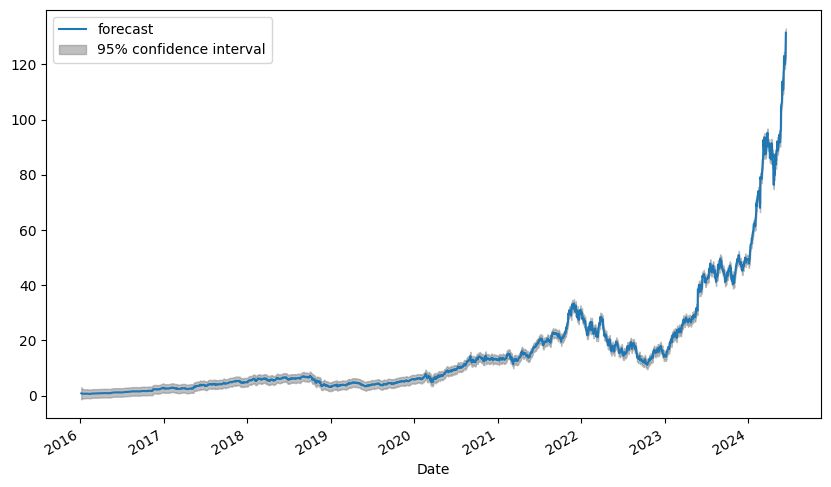

In [ ]:
plt.rcParams.update({'figure.figsize': (10,6)})
plot_predict(model_fit_aic, 2);
# El valor 2 significa que la predicción comenzará desde la segunda observación.
plt.show();

In [ ]:
print('ARIMA sin Rolling AIC - Horizonte de 7 días.')
yhat7_sin_aic = arima_sin_rolling(test7, model_fit_aic)

print('\nARIMA sin Rolling AIC - Horizonte de 14 días.')
yhat14_sin_aic = arima_sin_rolling(test14, model_fit_aic)

print('\nARIMA sin Rolling AIC - Horizonte de 21 días.')
yhat21_sin_aic = arima_sin_rolling(test21, model_fit_aic)

print('\nARIMA sin Rolling AIC - Horizonte de 28 días')
yhat28_sin_aic = arima_sin_rolling(test28, model_fit_aic)

ARIMA sin Rolling AIC - Horizonte de 7 días.
Predicho: 132.37591028373373, Observado: 130.9687957763672
Predicho: 131.91538428564942, Observado: 135.5684051513672
Predicho: 131.21451546419556, Observado: 130.76881408691406
Predicho: 131.45433391141233, Observado: 126.55917358398438
Predicho: 132.88003795018903, Observado: 118.0998992919922
Predicho: 135.10410220114403, Observado: 126.07920837402344
Predicho: 137.00966361121127, Observado: 126.38919067382812

ARIMA sin Rolling AIC - Horizonte de 14 días.
Predicho: 132.37591028373373, Observado: 130.9687957763672
Predicho: 131.91538428564942, Observado: 135.5684051513672
Predicho: 131.21451546419556, Observado: 130.76881408691406
Predicho: 131.45433391141233, Observado: 126.55917358398438
Predicho: 132.88003795018903, Observado: 118.0998992919922
Predicho: 135.10410220114403, Observado: 126.07920837402344
Predicho: 137.00966361121127, Observado: 126.38919067382812
Predicho: 137.87172968999604, Observado: 123.9793930053711
Predicho: 137.5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



#### Predicción ARIMA(3, 2, 4) sin Rolling

- ` Horizonte de 7 días:` El modelo ARIMA (3,2,4) muestra un ajuste moderado en este horizonte corto. Aunque las predicciones siguen la tendencia de los datos reales, se observa una ligera sobreestimación hacia el final del período. A pesar de esto, el modelo captura la dirección general.
- `Horizonte de 14 días:` A los 14 días, las predicciones comienzan a alejarse más de los datos reales. El modelo presenta una mayor sobreestimación en comparación con el horizonte de 7 días. Si bien sigue capturando la tendencia alcista, no logra reflejar correctamente las fluctuaciones recientes.
- `Horizonte de 21 días:` El modelo muestra una tendencia alzista que no se adapta a la tendencia real de los datos, difiere notablemente de los valores reales de la serie de tiempo en el tiempo propuesto.
- `Horizonte de 28 días: `Se observa una predicción no ajustada a la realidad, con diferencias en casi todos los puntos predichos, no se capta la tendencia de la serie de tiempo ni se predice adecuadamente.

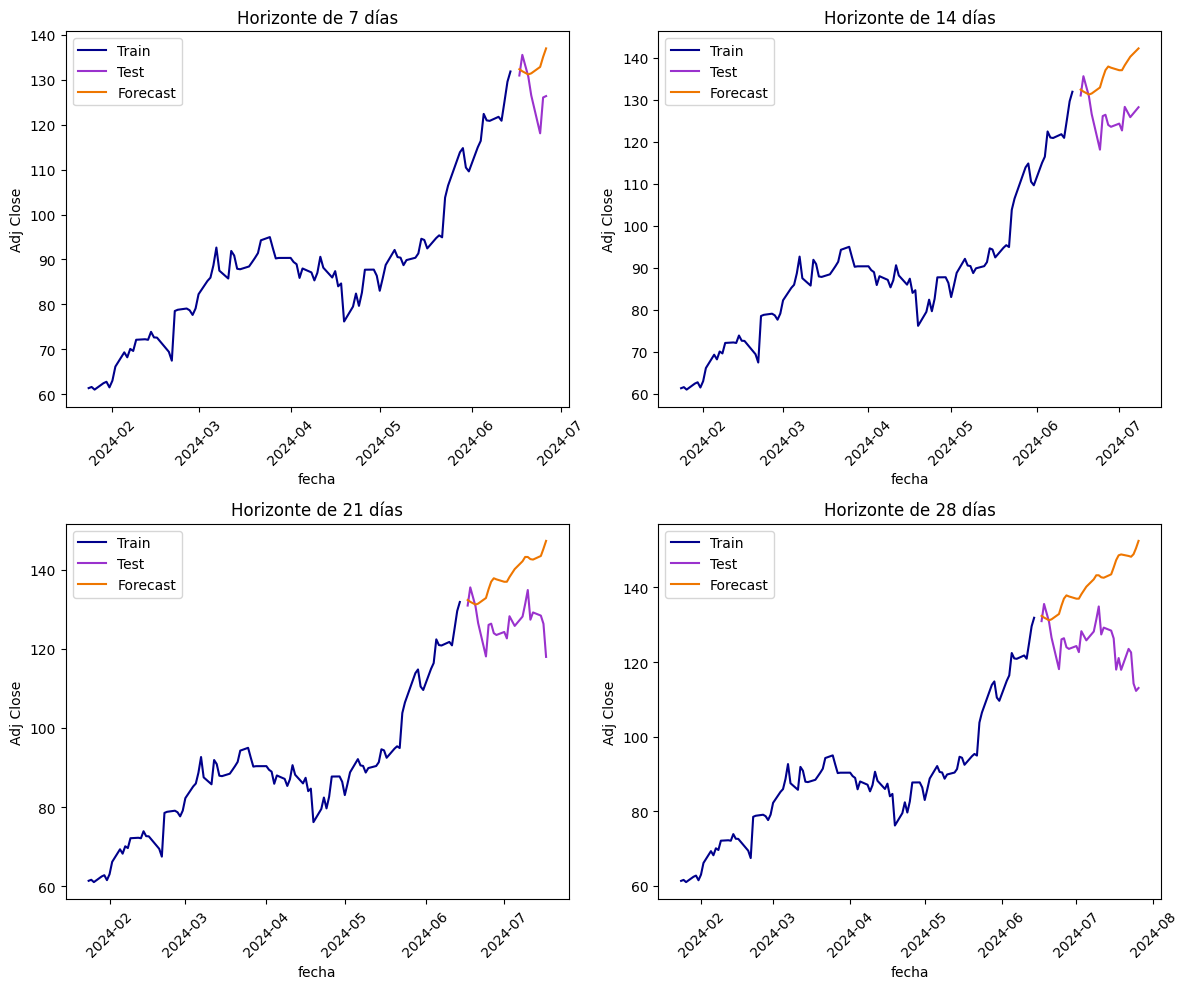

In [ ]:
fig , axs = plt.subplots(2 , 2 , figsize = (12 , 10))

# Horizonte de 7 días
sns.lineplot(ax = axs[0 , 0] , x = dates_train[-100:] , y = train[-100:] , label = "Train" , color = '#00008B')
sns.lineplot(ax = axs[0 , 0] , x = dates_test7 , y = test7 , label = "Test" , color = '#9A32CD')
sns.lineplot(ax = axs[0 , 0] , x = dates_test7 , y = yhat7_sin_aic , label = "Forecast" , color = '#EE7600')
axs[0 , 0].set_title("Horizonte de 7 días")
axs[0 , 0].tick_params(axis = 'x' , rotation = 45)

# Horizonte de 14 días
sns.lineplot(ax = axs[0 , 1] , x = dates_train[-100:] , y = train[-100:] , label = "Train" , color = '#00008B')
sns.lineplot(ax = axs[0 , 1] , x = dates_test14 , y = test14 , label = "Test" , color = '#9A32CD')
sns.lineplot(ax = axs[0 , 1] , x = dates_test14 , y = yhat14_sin_aic , label = "Forecast" , color = '#EE7600')
axs[0 , 1].set_title("Horizonte de 14 días")
axs[0 , 1].tick_params(axis = 'x' , rotation = 45)

# Horizonte de 21 días
sns.lineplot(ax = axs[1 , 0] , x = dates_train[-100:] , y = train[-100:] , label = "Train" , color = '#00008B')
sns.lineplot(ax = axs[1 , 0] , x = dates_test21 , y = test21 , label = "Test" , color = '#9A32CD')
sns.lineplot(ax = axs[1 , 0] , x = dates_test21 , y = yhat21_sin_aic , label = "Forecast" , color = '#EE7600')
axs[1 , 0].set_title("Horizonte de 21 días")
axs[1 , 0].tick_params(axis = 'x' , rotation = 45)

# Horizonte de 28 días
sns.lineplot(ax = axs[1 , 1] , x = dates_train[-100:] , y = train[-100:] , label = "Train" , color = '#00008B')
sns.lineplot(ax = axs[1 , 1] , x = dates_test28 , y = test28 , label = "Test" , color = '#9A32CD')
sns.lineplot(ax = axs[1 , 1] , x = dates_test28 , y = yhat28_sin_aic , label = "Forecast" , color = '#EE7600')
axs[1 , 1].set_title("Horizonte de 28 días")
axs[1 , 1].tick_params(axis = 'x' , rotation = 45)

plt.tight_layout()
plt.show()

### Modelo ARIMA(3, 2, 4) con Rolling

In [ ]:
def arima_rolling(history, test, best_order, solver='lbfgs', maxiter=500):
    predictions = []  # Lista donde se almacenarán las predicciones

    # Recorrer el conjunto de prueba
    for t in range(len(test)):
        try:
            # Suprimir advertencias para evitar que los mensajes llenen la salida
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")

                # Crear y ajustar un modelo ARIMA con los datos históricos
                model = ARIMA(history, order=best_order)
                model_fit = model.fit(method_kwargs={'maxiter': maxiter, 'solver': solver})  # Método correcto de paso de parámetros

                # Generar pronóstico para el siguiente valor (1 paso adelante)
                output = model_fit.forecast()
                yhat = output[0]  # El pronóstico es el primer valor del forecast

                predictions.append(yhat)  # Almacenar la predicción en la lista

                # Obtener el valor real observado en el conjunto de prueba
                obs = test[t]

                # Añadir la observación actual al conjunto de datos históricos
                history.append(obs)

                # Imprimir el valor pronosticado y el valor real
                print('predicho = %f, esperado = %f' % (yhat, obs))

        except Exception as e:
            print(f"Error al ajustar el modelo ARIMA: {e}")
            continue

    return predictions

In [ ]:
print('ARIMA Rolling AIC- Horizonte de 7 días.')
yhat7_aic = arima_rolling(train_list, test7, (3, 2, 4)) # Changed best_aic to best_order_aic

print('\nARIMA Rolling AIC - Horizonte de 14 días.')
yhat14_aic = arima_rolling(train_list, test14, (3, 2, 4))

print('\nARIMA Rolling AIC - Horizonte de 21 días.')
yhat21_aic = arima_rolling(train_list, test21, (3, 2, 4))

print('\nARIMA Rolling AIC - Horizonte de 28 días.')
yhat28_aic = arima_rolling(train_list, test28, (3, 2, 4))

ARIMA Rolling AIC- Horizonte de 7 días.
predicho = 112.824900, esperado = 130.968796
predicho = 131.889858, esperado = 135.568405
predicho = 136.024256, esperado = 130.768814
predicho = 128.566780, esperado = 126.559174
predicho = 125.064973, esperado = 118.099899
predicho = 117.688317, esperado = 126.079208
predicho = 128.922439, esperado = 126.389191

ARIMA Rolling AIC - Horizonte de 14 días.
predicho = 128.792309, esperado = 130.968796
predicho = 130.907575, esperado = 135.568405
predicho = 133.959218, esperado = 130.768814
predicho = 127.816566, esperado = 126.559174
predicho = 125.313533, esperado = 118.099899
predicho = 118.836937, esperado = 126.079208
predicho = 129.276024, esperado = 126.389191
predicho = 130.061128, esperado = 123.979393
predicho = 126.195972, esperado = 123.529434
predicho = 123.654199, esperado = 124.289368
predicho = 126.149658, esperado = 122.659508
predicho = 121.233968, esperado = 128.269028
predicho = 127.709675, esperado = 125.819237
predicho = 127.64

#### Predicción ARIMA(3, 2, 4) con Rolling

- `Horizonte de 7 días:`
El modelo con rolling muestra una mejora notable en comparación con el enfoque sin recalibración. Las predicciones siguen bastante cerca los valores reales, y aunque hay pequeñas diferencias, la precisión es alta. La tendencia y la variabilidad de los datos se capturan adecuadamente en este horizonte corto.

- `Horizonte de 14 días:`
A los 14 días, el modelo sigue logrando un ajuste razonablemente bueno. Aunque las predicciones comienzan a separarse con mayor consideración de los valores reales en algunos puntos,  La dirección de la tendencia sigue siendo correctamente identificada pero las desviaciones han exagerado un poco más que el horizonte anterior.

- `Horizonte de 21 días:`
En el horizonte de 21 días, las predicciones siguen representando bien la dirección general de la tendencia y muestran menos desviaciones que los horizontes anteriores.

- `Horizonte de 28 días:`
Para el horizonte más largo, de 28 días, el modelo no muestra un ajuste adecuado en la predicción de la serie, sin embargo si en la tendencia.

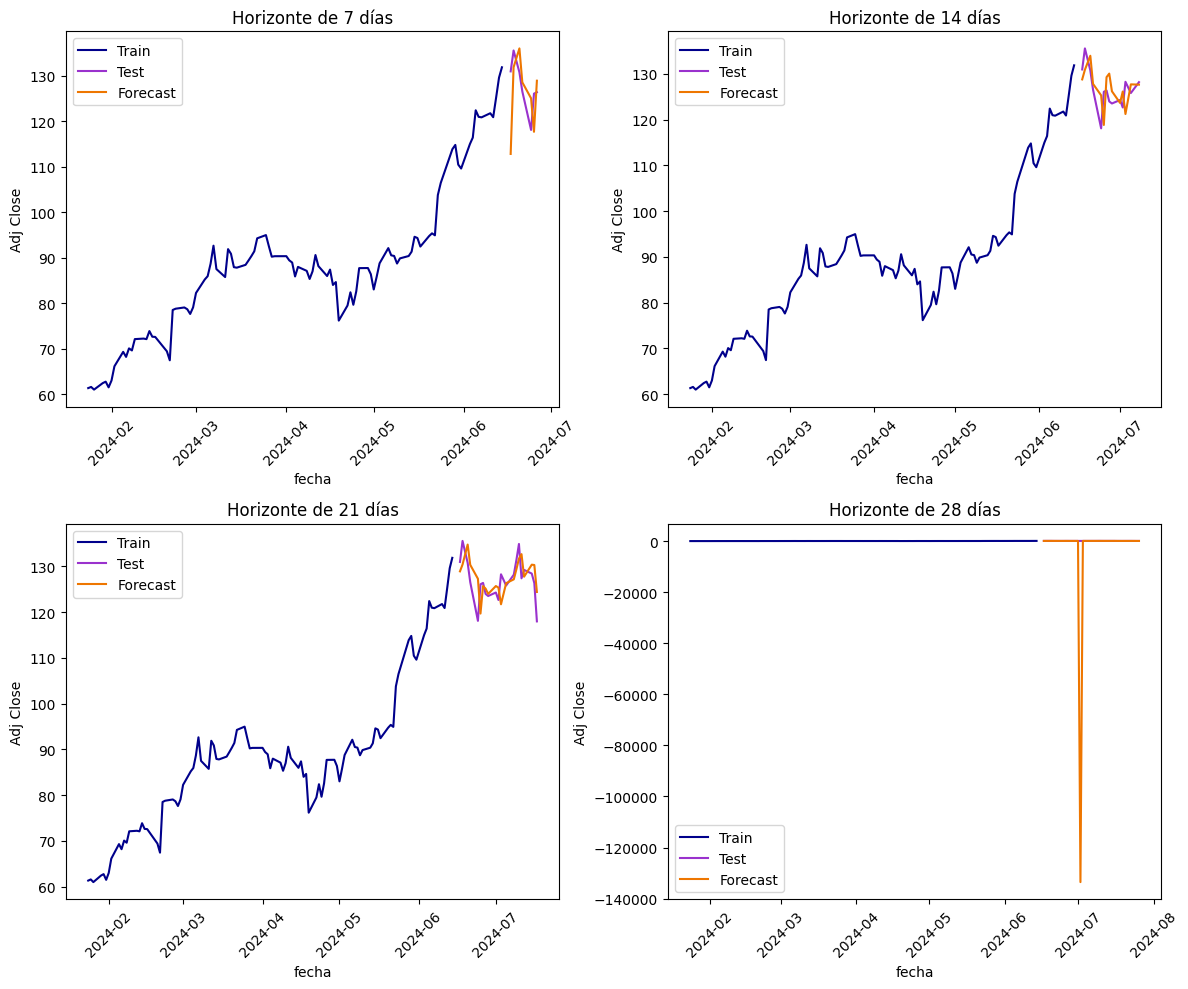

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# -100: seleccionar los últimos 100 elementos.

# Horizonte de 7 días
sns.lineplot(ax = axs[0, 0], x = dates_train[-100:], y = train[-100:], label = 'Train', color = '#00008B')
sns.lineplot(ax = axs[0, 0], x = dates_test7, y = test7, label = 'Test', color = '#9A32CD')
sns.lineplot(ax = axs[0, 0], x = dates_test7, y = yhat7_aic, label = 'Forecast', color = '#EE7600')
axs[0, 0].set_title('Horizonte de 7 días')
axs[0, 0].tick_params(axis = 'x', rotation = 45)

# Horizonte de 14 días
sns.lineplot(ax = axs[0, 1], x = dates_train[-100:], y = train[-100:], label = 'Train', color = '#00008B')
sns.lineplot(ax = axs[0, 1], x = dates_test14, y = test14, label = 'Test', color = '#9A32CD')
sns.lineplot(ax = axs[0, 1], x = dates_test14, y = yhat14_aic, label = 'Forecast', color = '#EE7600')
axs[0, 1].set_title('Horizonte de 14 días')
axs[0, 1].tick_params(axis = 'x', rotation = 45)

# Horizonte de 21 días
sns.lineplot(ax = axs[1, 0], x = dates_train[-100:], y = train[-100:], label = 'Train', color = '#00008B')
sns.lineplot(ax = axs[1, 0], x = dates_test21, y = test21, label = 'Test', color = '#9A32CD')
sns.lineplot(ax = axs[1, 0], x = dates_test21, y = yhat21_aic, label = 'Forecast', color = '#EE7600')
axs[1, 0].set_title('Horizonte de 21 días')
axs[1, 0].tick_params(axis = 'x', rotation = 45)

# Horizonte de 28 días
sns.lineplot(ax = axs[1, 1], x = dates_train[-100:], y = train[-100:], label = 'Train', color = '#00008B')
sns.lineplot(ax = axs[1, 1], x = dates_test28, y = test28, label = 'Test', color = '#9A32CD')
sns.lineplot(ax = axs[1, 1], x = dates_test28, y = yhat28_aic, label = 'Forecast', color = '#EE7600')
axs[1, 1].set_title('Horizonte de 28 días')
axs[1, 1].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



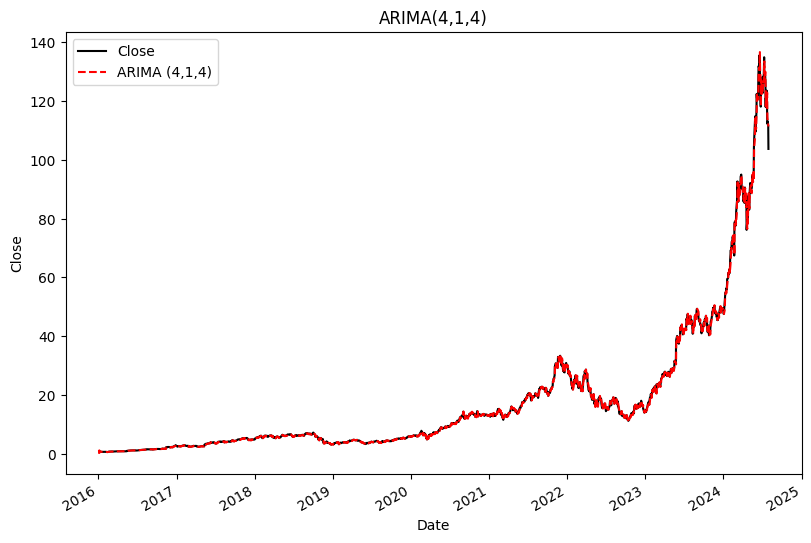

In [ ]:
# Set the best order for ARIMA (3, 2, 4)
best_order = (3, 2, 4)

# Fit the ARIMA model on the 'Adj Close' column (ensuring missing values are dropped)
model = ARIMA(data['Adj Close'].dropna(), order=best_order)
model_fit = model.fit()

# Store the fitted values in the dataframe
data['ARIMA'] = model_fit.fittedvalues

# Create the plot for actual vs. ARIMA(4,1,4) predictions
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(9.5, 6.5)
data['Close'].plot(color='k', linestyle='-', ax=axarr, label='Close')
data['ARIMA'].plot(color='r', linestyle='--', ax=axarr, label='ARIMA (3,2,4)')
axarr.set_title('ARIMA(4,1,4)')
plt.xlabel('Date')
plt.ylabel('Close')

# Display the legend
axarr.legend()
plt.show()

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,fecha,Adj Close Diff,ARIMA
Date,,,,,,,,,
2016-01-04,0.80725,0.81450,0.80100,0.80925,0.789858,358076000,2016-01-04,NaN,0.000000
2016-01-05,0.82450,0.83600,0.81250,0.82225,0.802547,490272000,2016-01-05,0.012688,1.184787
2016-01-06,0.80875,0.81250,0.77900,0.78825,0.769361,449344000,2016-01-06,-0.033185,0.815236
2016-01-07,0.76850,0.77375,0.74700,0.75700,0.738860,645304000,2016-01-07,-0.030501,0.758243
2016-01-08,0.76675,0.76750,0.73925,0.74075,0.723000,398472000,2016-01-08,-0.015861,0.721182


#### Verificación de estacionariedad ARIMA(3, 2, 4)

La gráfica de autocorrelación `(ACF) `y autocorrelación parcial `(PACF)` muestra los residuos del modelo ARIMA ajustado, y no presenta correlaciones significativas más allá del primer rezago, lo cual sugiere que los residuos son esencialmente ruido blanco. Esto indica que el modelo ha capturado bien la estructura de la serie temporal, y los residuos no presentan patrones discernibles. En cuanto a la estacionariedad, los residuos parecen ser estacionarios, ya que no muestran tendencias ni autocorrelaciones significativas.

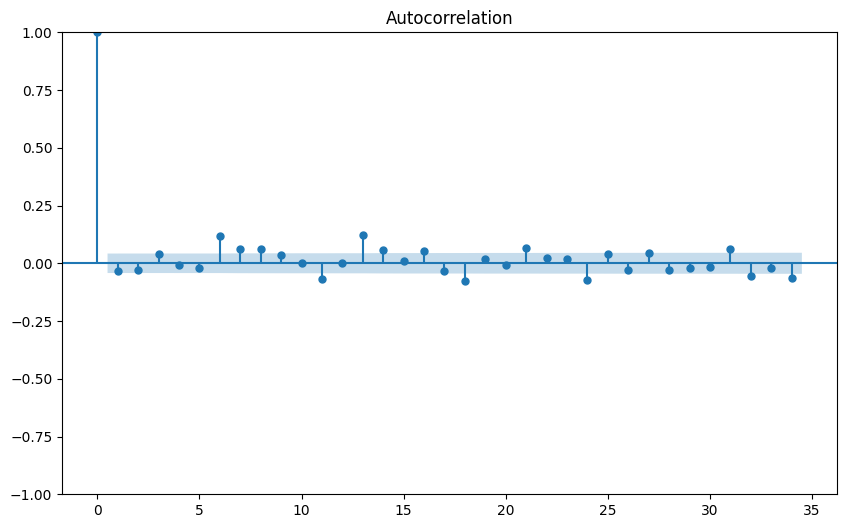

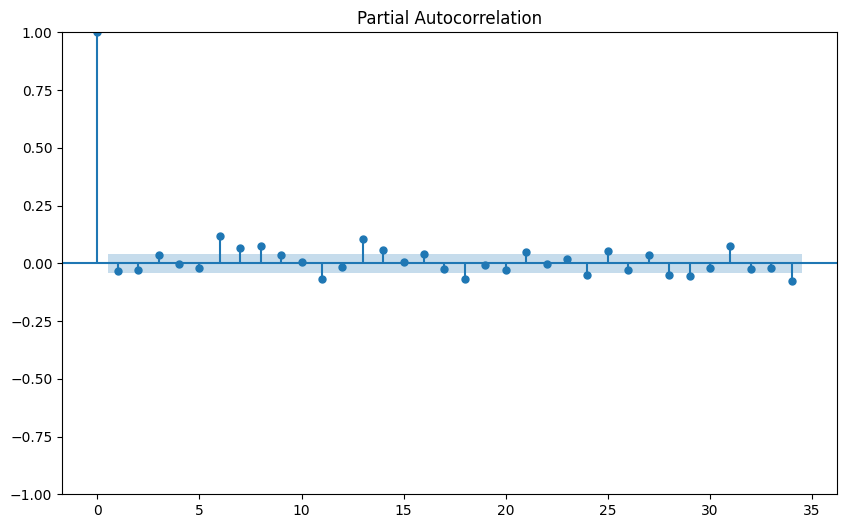

In [ ]:
residuals = model_fit.resid
plot_acf(residuals)
plt.show()

plot_pacf(residuals)
plt.show()

#### Normalidad en los residuos

El resultado de la prueba Shapiro-Wilk indica que los residuos no siguen una distribución normal (p-valor < 0.05). En el gráfico Q-Q plot, los puntos se desvían significativamente de la línea teórica, confirmando la no normalidad.

Estadístico Shapiro-Wilk: 0.6204449137751455
p-valor: 2.9603273854657362e-56
Los residuos no parecen seguir una distribuvión normal.


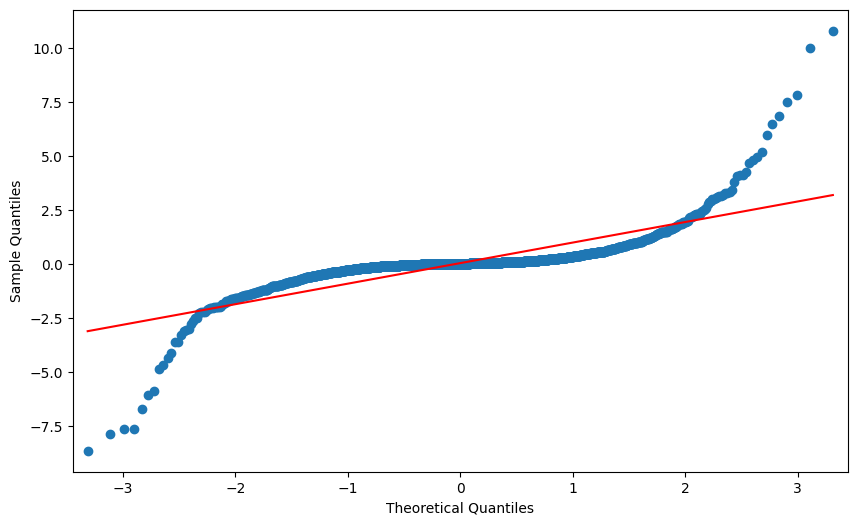

In [ ]:
stats, p_value =shapiro(residuals)
print(f'Estadístico Shapiro-Wilk: {stats}')
print(f'p-valor: {p_value}')

if p_value > 0.05:
    print("Los residuales son aproximadamente normales.")
else:
  print('Los residuos no parecen seguir una distribuvión normal.')

sm.qqplot(residuals, line='s')
plt.show()

#### Homocedasticidad en los residuos

Se observa la grafica de varianza conforme avanza la serie temporal a través del tiempo y se evidencia un aumento constante y considerable de la varianza en las observaciones, por lo que los residuos no son homocedasticos. Además, se observa que los residuos del modelo ARIMA muestra que, aunque los residuos se mantienen cerca de cero en los primeros años, hay un aumento significativo en la volatilidad a partir de 2020, lo que indica que el modelo no captura adecuadamente las variaciones recientes.

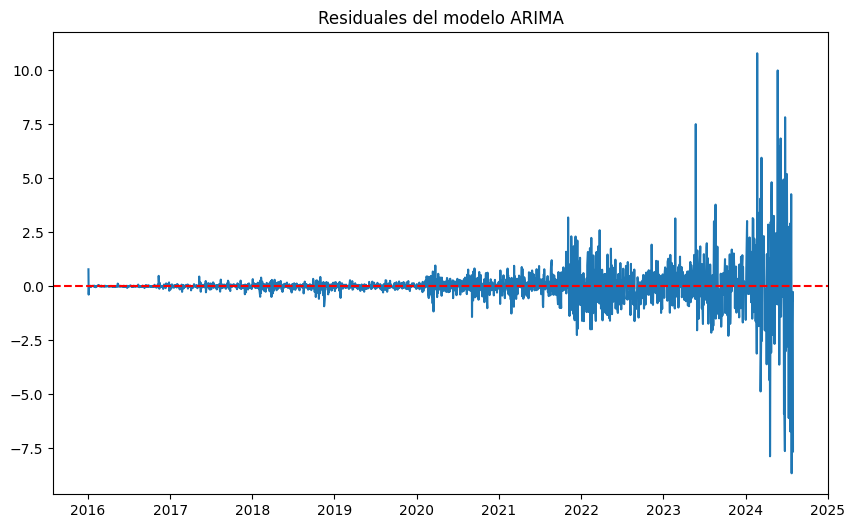

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuales del modelo ARIMA')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

**Ruido blanco de los datos**

El resultado de la prueba de Ljung-Box muestra un p-valor de 9.9100e-09, menor que 0.05, lo que indica que los residuos no son ruido blanco. Ruido blanco se refiere a una serie temporal cuyos valores son independientes y no están correlacionados entre sí, es decir, no siguen un patrón. En este caso, al no ser ruido blanco, los residuos del modelo ARIMA contienen patrones o correlaciones no capturadas completamente, lo que sugiere que el modelo podría mejorarse para explicar mejor la variabilidad observada en los datos.

In [ ]:
lb = acorr_ljungbox(residuals, lags = [10], return_df = True)
print(lb)

      lb_stat     lb_pvalue
10  57.684825  9.910026e-09


**Resumen estadístico de la estacionariedad**

In [ ]:
import statsmodels.tsa.api as smtsa
arima_obj = smtsa.ARIMA(data['Adj Close'].tolist(), order=(4, 1, 4))
arima_obj_fit = arima_obj.fit()
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2157
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2954.813
Date:                Sat, 21 Sep 2024   AIC                           5927.626
Time:                        18:03:39   BIC                           5978.710
Sample:                             0   HQIC                          5946.312
                               - 2157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0644      0.064      1.008      0.313      -0.061       0.190
ar.L2          1.0535      0.052     20.213      0.000       0.951       1.156
ar.L3          0.0083      0.056      0.147      0.883      -0.102       0.118
ar.L4         -0.2408      0.050     -4.826      0.000      -0.339      -0.143
ma.L1         -0.0988      0.061     -1.632      0.103      -0.218       0.020
ma.L2         -1.1225      0.051    -21.843      0.000      -1.223      -1.022
ma.L3          0.0202      0.052      0.390      0.697      -0.081       0.122
ma.L4          0.3912      0.049      7.978      0.000       0.295       0.487
sigma2         0.9075      0.007    130.269      0.000       0.894       0.921
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            102640.58
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             234.85   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

La gráfica muestra un análisis de residuos de una serie temporal. La primera gráfica, "Standardized Residual for y", indica variaciones crecientes en los residuos, lo que sugiere heterocedasticidad. El histograma con densidad estimada muestra que los residuos no siguen una distribución normal, con una desviación leve en la cola derecha. El gráfico Q-Q confirma la falta de normalidad, especialmente en los extremos. Finalmente, el correlograma indica que los residuos no están correlacionados, lo que sugiere independencia de los errores.

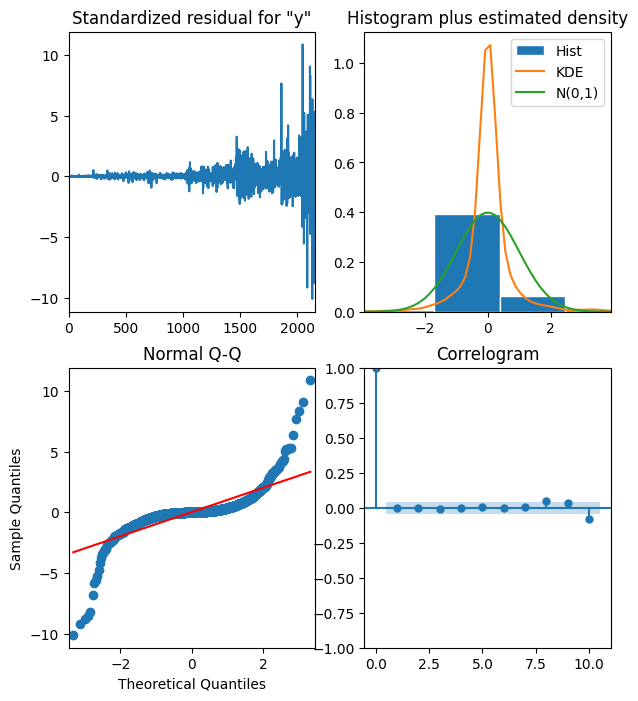

In [ ]:
arima_obj_fit.plot_diagnostics(figsize=(7,8))
plt.show()


#### Métricas del modelo ARIMA(3, 2, 4)


Las métricas de precisión del modelo evaluado con diferentes ventanas temporales muestran que el error absoluto medio `(MAE)` y el error cuadrático medio `(MSE) `son menores en las ventanas de 14 y 21 días, lo que indica una mejor precisión en esas duraciones. Sin embargo, a 28 días, las métricas aumentan drásticamente, lo que sugiere que el modelo pierde precisión a largo plazo. El R2 negativo también muestra que el modelo no ajusta bien los datos en esas ventanas más largas.

In [ ]:
accuracy7_aic =  forecast_accuracy(np.array(test7), np.array(yhat7_aic), "7 días")
accuracy14_aic = forecast_accuracy(np.array(test14), np.array(yhat14_aic), "14 días")
accuracy21_aic = forecast_accuracy(np.array(test21), np.array(yhat21_aic), "21 días")
accuracy28_aic = forecast_accuracy(np.array(test28), np.array(yhat28_aic), "28 días")

accuracy_rolling = pd.concat([accuracy7_aic, accuracy14_aic, accuracy21_aic, accuracy28_aic])

In [ ]:
accuracy_rolling

,MAE,MSE,MAPE,RMSE,R2
7 días,6.710672,7.138850e+01,0.055657,8.449171,-1.779580e+00
14 días,3.640532,1.864867e+01,0.028911,4.318411,-1.232154e-01
21 días,3.305670,1.654267e+01,0.025971,4.067269,1.447497e-01
28 días,4777.499811,6.381263e+08,0.064486,25261.162301,-1.821399e+07


En el modelo sin rolling, las métricas indican un aumento significativo de los errores a medida que se extiende el horizonte de predicción. El MAE y el MSE crecen considerablemente, especialmente a partir de los 14 días, donde el error absoluto alcanza su máximo en la ventana de 28 días (MAE: 16.85). El R2 negativo sugiere que el modelo no está capturando bien las variaciones de los datos, con una caída de rendimiento particularmente marcada en las predicciones a largo plazo. El RMSE también refleja este deterioro progresivo del modelo sin rolling.

In [ ]:
accuracy7_not_aic = forecast_accuracy(np.array(test7), np.array(yhat7_sin_aic), "7 días")
accuracy14_not_aic = forecast_accuracy(np.array(test14), np.array(yhat14_sin_aic), "14 días")
accuracy21_not_aic = forecast_accuracy(np.array(test21), np.array(yhat21_sin_aic), "21 días")
accuracy28_not_aic = forecast_accuracy(np.array(test28), np.array(yhat28_sin_aic), "28 días")

accuracy_not_rolling = pd.concat([ accuracy7_not_aic, accuracy14_not_aic, accuracy21_not_aic, accuracy28_not_aic])

In [ ]:
accuracy_not_rolling

,MAE,MSE,MAPE,RMSE,R2
7 días,6.403786,64.597347,0.047786,8.037247,-1.515160
14 días,9.863232,122.154163,0.071959,11.052337,-6.357384
21 días,11.926151,180.208978,0.084994,13.424194,-8.316740
28 días,16.850416,392.743802,0.116581,19.817765,-10.210058


**Correlación entre valores predichos y observados**

La gráfica muestra la relación entre los valores reales y los estimados para horizontes de 7, 14, 21 y 28 días. Para los primeros tres horizontes, los puntos siguen aproximadamente la línea de correlación, indicando una predicción aceptable, aunque con algunos errores dispersos. Sin embargo, en el horizonte de 28 días, los valores estimados son extremadamente erróneos, ya que todos los puntos están alineados en un rango muy bajo, lo que indica una falla significativa del modelo para predicciones a largo plazo.

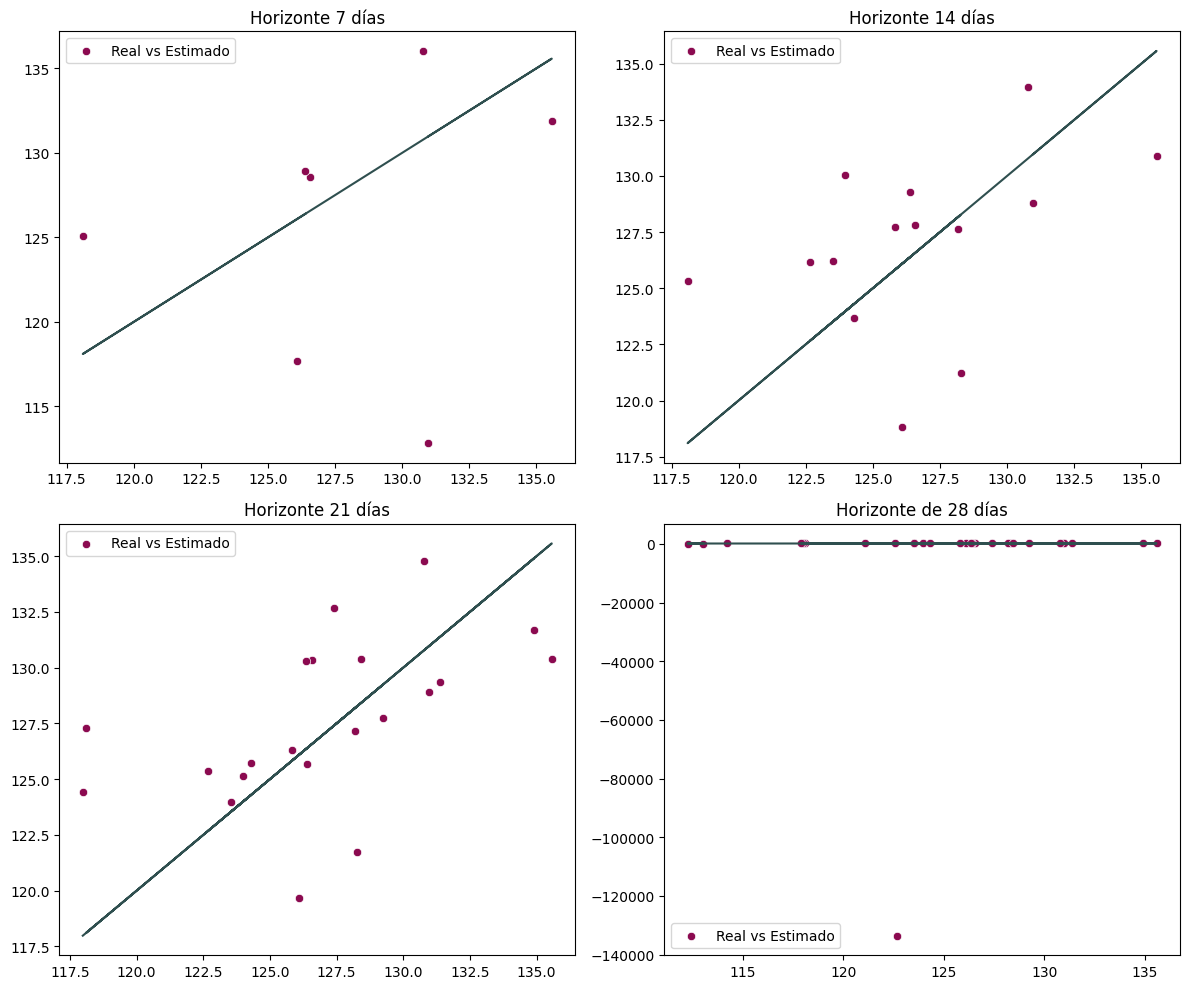

In [ ]:
plt.rcParams.update({'figure.figsize' : (12 , 10)})
fig , axes = plt.subplots(nrows = 2 , ncols = 2)

# Horizonte de 7 días
sns.scatterplot(x = test7 , y = yhat7_aic , ax = axes[0 , 0] , color = '#8B0A50' , label = 'Real vs Estimado')
axes[0 , 0].plot(test7 , test7 , color = '#2F4F4F' , label = 'Correlación')
axes[0 , 0].set_title('Horizonte 7 días' , fontsize = 12)

# Horizonte de 14 días
sns.scatterplot(x = test14 , y = yhat14_aic , ax = axes[0 , 1] , color = '#8B0A50' , label = 'Real vs Estimado')
axes[0 , 1].plot(test14 , test14 , color = '#2F4F4F' , label = 'Correlación')
axes[0 , 1].set_title('Horizonte 14 días' , fontsize = 12)

# Horizonte de 21 días
sns.scatterplot(x = test21 , y = yhat21_aic , ax = axes[1 , 0] , color = '#8B0A50' , label = 'Real vs Estimado')
axes[1 , 0].plot(test21 , test21 , color = '#2F4F4F' , label = 'Correlación')
axes[1 , 0].set_title('Horizonte 21 días' , fontsize = 12)

# Horizonte de 28 días
sns.scatterplot(x = test28 , y = yhat28_aic , ax = axes[1 , 1] , color = '#8B0A50' , label = 'Real vs Estimado')
axes[1 , 1].plot(test28 , test28 , color = '#2F4F4F' , label = 'Correlación')
axes[1 , 1].set_title('Horizonte de 28 días' , fontsize = 12)

plt.tight_layout()
plt.show()

## Conclusiones criuterios BIC y HQIC Modelo ARIMA(3, 2, 4)

El modelo ARIMA con rolling mostró un mejor rendimiento en los primeros horizontes, particularmente en 7 y 14 días, donde los errores fueron menores (MAE: 6.71, RMSE: 8.44). No obstante, el valor de R² negativo en estos horizontes indica una limitada capacidad del modelo para explicar la variabilidad de los datos. Por otro lado, el modelo sin rolling presentó un rendimiento considerablemente peor en todos los horizontes de predicción. Los errores son más altos desde los 7 días, alcanzando un MAE de 16.85 y un RMSE de 19.81 a los 28 días, lo que resalta una capacidad predictiva aún más deficiente.

Ambos modelos muestran problemas para capturar los patrones presentes en los datos, lo que se refleja en las pruebas de normalidad y análisis de residuos que no siguen características de ruido blanco. Para mejorar el ajuste, sería recomendable explorar técnicas más complejas, como modelos heterocedásticos o variantes no lineales que puedan ajustarse mejor a las dinámicas de la serie.

# Conclusión

En el modelo `ARIMA(3,0,3)` con rolling, se observa un mejor ajuste en los horizontes cortos, con `MAE` de 4.79 y RMSE de 5.38 a los 7 días. Sin embargo, el `R²` negativo indica que la capacidad del modelo para explicar la variabilidad de los datos es limitada. A medida que aumenta el horizonte (hasta 28 días), el `MAE` y `RMSE` se incrementan significativamente `(MAE de 17.87 y RMSE de 20.94)`, lo que refleja una mala capacidad predictiva a largo plazo. Además, el análisis de residuos muestra que no siguen una distribución normal ni características de ruido blanco, lo que indica que el modelo no captura bien todos los patrones en los datos.

En comparación, el `ARIMA(3,2,4)` con rolling que describí también presenta un mejor rendimiento en los horizontes cortos (7 y 14 días), con `MAE` de 6.71 y RMSE de 8.44 a los 7 días. Aunque los errores son algo más altos que en el modelo `ARIMA(3,0,3)`, el patrón es similar en cuanto a la limitada capacidad explicativa del modelo en los primeros horizontes, reflejada en los valores negativos de R². En los horizontes más largos (21 y 28 días), los errores también aumentan, aunque el deterioro no es tan severo como en el modelo `ARIMA(3,0,3`).

`ARIMA(3,0,3)` es mejor para predicciones a corto plazo, mientras que `ARIMA(3,2,4)` maneja un poco mejor los horizontes más largos. Ninguno de los dos modelos captura completamente la variabilidad de los datos ni presenta buenos resultados para horizontes más largos, lo que sugiere que sería recomendable explorar técnicas más avanzadas para mejorar el rendimiento general. Por ejercicio académico se desarroló el despliegue y comparativa entre modelos de series temporsales.